In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Managing Dependencies Before Get Started:

In [2]:
# check if packages are installed: open conda prompt and run:

# conda search scipy
# conda search matplotlib
# conda search seaborn
# verify package version: sea.__version__ (example using seaborn)

# installing packages:

# when you code using main env:
# conda install scipy
# or (specific version):
# conda install scipy=0.15.0

# when you code in many environments (rare):
# conda install --name myenv scipy


# Listas Úteis

In [3]:
cover         = ['CG', 'RO']
weathered     = ['FMN', 'HCT', 'ICT', 'IMN']
mn_rocks      = ['IMN', 'FMN']
fresh_clean   = ['HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
str_ore       = ['FMN', 'HCT', 'ICT', 'IMN', 'HC', 'HF', 'IC', 'IDO', 'IF', 'IFR']
ore_rocks     = str_ore + cover
carb_rocks    = ['IDO', 'DO', 'BR']
basin_rocks   = ['IC', 'IF']

teores_gl     = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl']
faixas        = ['g1', 'g2', 'g3', 'g4']
param_event   = ['fegl', 'sigl', 'pgl', 'algl', 'mngl', 'pfgl', 'tigl', 'mggl', 'cagl', 'g1', 'g2', 'g3', 'g4']

not_countable = ['furo','na','de','ate','clv','clm','flx_an','flx_an_or','da_ana','da_sam','d_agru','tipo_am','global','mass_t','status']

## Load data

In [4]:
fso = pd.read_csv('abo_0720_flp_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")

In [5]:
amf = pd.read_csv('abo_0720_amf_fso_assay.csv', low_memory=False, na_values='-99')

In [6]:
cac = pd.read_csv('aboabo_cac_entry.csv', low_memory=False, na_values='-99')

### Extracting cli fso  database content:

In [7]:
fso.cli.unique()

array(['HF', 'IFR', 'IF', 'IC', 'AG', 'HCT', 'ICT', 'IN', 'AT', 'CG',
       'IMN', 'FMN', 'SR', 'IDO', 'DO', 'HC', 'VQ', 'QF', 'FL', 'DT',
       'BR', 'LT', 'RO', 'CH', 'RO_L'], dtype=object)

## Basic Exploratory Data Analysis

In [8]:
fso.describe()

de           ate        length          fegl          sigl  \
count  14007.000000  14007.000000  14007.000000  13054.000000  13054.000000   
mean      92.036748     98.409989      6.373241     40.895073     34.850804   
std       80.583579     81.409130      6.700932     13.852102     20.393069   
min        0.000000      0.250000      0.010000      0.100000      0.080000   
25%       32.000000     38.700000      2.000000     32.869000     16.889750   
50%       74.000000     80.000000      5.000000     38.918000     39.486000   
75%      130.000000    136.000000      9.200000     50.607500     49.900750   
max      700.800000    701.250000    171.650000     69.581000     98.977000   

                pgl          algl          mngl          pfgl          tigl  \
count  13054.000000  12711.000000  12684.000000  12633.000000  12399.000000   
mean       0.051249      1.550418      0.867314      2.853820      0.078589   
std        0.055640      2.623823      3.441356      5.450193      0.165979   
min        0.005000      0.010000      0.002000      0.000000      0.002000   
25%        0.022000      0.400000      0.010000      0.599000      0.016000   
50%        0.035000      0.790000      0.041000      1.350000      0.034000   
75%        0.060000      1.690000      0.221000      2.830000      0.075000   
max        1.789000     37.970000     41.504000     45.710000      2.699000   

               mggl          cagl         fogl        fe3o4           g1  \
count  12398.000000  12399.000000  1678.000000  4629.000000  6306.000000   
mean       0.373103      0.507875     0.725597     0.916625    39.902572   
std        2.291229      3.439951     0.863139     1.512307    28.420702   
min        0.007000      0.003000     0.100000     0.067000     0.000000   
25%        0.010000      0.010000     0.210000     0.400000    15.368500   
50%        0.022000      0.010000     0.544000     0.600000    33.547000   
75%        0.066000      0.023000     0.870750     0.900000    63.503750   
max       21.200000     30.791000    10.940000    26.354000   100.000000   

                g2          g23           g3           g4          fe1  \
count  6071.000000  6306.000000  6071.000000  6306.000000  6293.000000   
mean     12.180662    20.412836     8.094482    39.685626    46.038325   
std       6.851886    10.805497     5.891968    23.981370    15.668790   
min       0.000000     0.000000     0.000000     0.000000     1.120000   
25%       7.158000    12.698500     4.048500    18.951750    35.280000   
50%      11.449000    19.331500     7.344000    39.496500    46.270000   
75%      16.010000    26.857500    10.636000    58.287500    60.220000   
max      54.899000    71.900000    69.200000    94.600000    69.600000   

               si1           p1          al1          mn1          pf1  \
count  6293.000000  6293.000000  6293.000000  6293.000000  6293.000000   
mean     28.474764     0.050324     1.130592     0.794523     2.628724   
std      22.017154     0.057583     1.947381     3.331838     4.677111   
min       0.100000     0.005000     0.010000     0.002000     0.000000   
25%       6.620000     0.018000     0.240000     0.010000     0.360000   
50%      27.600000     0.031000     0.450000     0.030000     1.100000   
75%      45.990000     0.061000     1.130000     0.150000     3.300000   
max      98.000000     1.171000    29.640000    42.200000    45.090000   

               ti1          mg1          ca1         fo1      fe3o4_1  \
count  6058.000000  6058.000000  6058.000000  753.000000  1539.000000   
mean      0.061698     0.286366     0.416707    0.927742     1.350682   
std       0.134976     1.803607     2.908930    0.911089     2.234420   
min       0.002000     0.007000     0.003000    0.100000     0.067000   
25%       0.014000     0.010000     0.010000    0.490000     0.400000   
50%       0.030000     0.021000     0.011000    0.770000     0.700000   
75%       0.061000     0.066750     0.027000    1.050000     1.

### Extracting cli database amf content:¶

In [9]:
amf.cli.unique()

array(['CG', 'HF', 'IC', 'IF', 'HC', 'HCT', 'IFR', 'ICT', 'IN', 'FMN',
       'IMN', 'AT', 'RO', 'FL', 'QF', 'AG'], dtype=object)

## descrição quick das amostras de frente e lavra

In [10]:
amf.describe()

de          ate       length         fegl         sigl  \
count  5657.000000  5657.000000  5657.000000  5452.000000  5452.000000   
mean     15.438902    21.682040     6.243138    55.913463    15.329415   
std      22.222424    23.355354     2.405972    12.133846    18.229843   
min       0.000000     1.000000     1.000000     6.270000     0.100000   
25%       0.000000     4.000000     4.000000    47.002250     1.133000   
50%       6.000000    12.000000     6.000000    61.090000     4.822000   
75%      24.660000    32.000000     8.100000    65.714000    28.586500   
max     141.000000   149.000000    35.900000    69.947000    91.736000   

               pgl         algl         mngl         pfgl         tigl  \
count  5452.000000  5452.000000  5452.000000  3977.000000  2885.000000   
mean      0.049374     1.821781     0.291863     2.255305     0.085371   
std       0.053866     2.202118     1.802654     2.686229     0.148175   
min       0.010000     0.100000     0.010000     0.100000     0.010000   
25%       0.020000     0.656000     0.010000     0.586000     0.023000   
50%       0.034000     1.241500     0.010000     1.225000     0.042000   
75%       0.058000     2.215250     0.014000     2.739000     0.082000   
max       1.030000    34.732000    26.874000    19.976000     1.873000   

              mggl         cagl  fogl  fe3o4           g1           g2  \
count  2885.000000  2885.000000   0.0    0.0  5377.000000  5377.000000   
mean      0.035952     0.013465   NaN    NaN    31.609903    18.191148   
std       0.052990     0.015873   NaN    NaN    18.353901     7.343685   
min       0.010000     0.010000   NaN    NaN     0.000000     0.000000   
25%       0.010000     0.010000   NaN    NaN    18.211000    12.771000   
50%       0.016000     0.010000   NaN    NaN    28.522000    17.800000   
75%       0.035000     0.011000   NaN    NaN    41.500000    23.100000   
max       0.542000     0.337000   NaN    NaN    93.208000    67.900000   

               g23           g3           g4          fe1          si1  \
count  5377.000000  5377.000000  5377.000000  5360.000000  5360.000000   
mean     27.881280     9.690132    40.510041    61.042369     7.351336   
std       9.665817     5.373783    17.737556     9.722866    13.520404   
min       2.058000     0.000000     0.693000    11.780000     0.100000   
25%      21.000000     6.627000    27.900000    59.180000     0.500000   
50%      27.953000     8.970000    40.054000    64.680000     1.330000   
75%      34.493000    11.523000    52.100000    67.420000     5.442500   
max      75.600000    63.800000    97.900000    70.000000    82.140000   

                p1          al1          mn1          pf1          ti1  \
count  5360.000000  5360.000000  5360.000000  3886.000000  2860.000000   
mean      0.045694     2.127228     0.392474     2.554753     0.077768   
std       0.054116     2.880074     2.422624     3.003891     0.130446   
min       0.010000     0.100000     0.010000     0.100000     0.010000   
25%       0.016000     0.390000     0.010000     0.400000     0.021000   
50%       0.028000     1.020000     0.010000     1.210000     0.043000   
75%       0.053000     2.890000     0.012000     3.820000     0.081000   
max       1.051000    35.950000    34.813000    19.870000     1.790000   

               mg1          ca1  fo1  fe3o4_1          fe2          si2  \
count  2860.000000  2860.000000  0.0      0.0  5376.000000  5376.000000   
mean      0.038664     0.013910  NaN      NaN    62.478378     6.137636   
std       0.057473     0.019243  NaN      NaN     8.102818    10.486258   
min       0.010000     0.010000  NaN      NaN     5.020000     0.100000   
25%       0.010000     0.010000  NaN      NaN    60.520000     0.620000   
50%       0.012000     0.010000  NaN      NaN    65.635000     1.590000   
75%       0.040000     0.010000  NaN      NaN    67.570000     5.535000   
max       0.645000     0.402000  NaN      NaN    70.000000    93.160000   

     

### Extracting geocod content from cac database:

In [11]:
cac.geocod.unique()

array(['CG', 'HF', 'IFR', 'IF', 'HC', 'IC', 'ICT', 'FMN', 'IMN', 'HCT',
       'QF', 'IDO', 'RO'], dtype=object)

In [12]:
cac.describe()

midx          midy          midz           botx          boty  \
count   11502.000000  1.150200e+04  11502.000000   11502.000000  1.150200e+04   
mean   617641.174062  7.770517e+06   1248.779260  617640.616198  7.770517e+06   
std       456.745665  9.747784e+02     82.507608     456.368942  9.749794e+02   
min    616003.221000  7.767205e+06    886.074000  616002.858000  7.767205e+06   
25%    617374.987000  7.770035e+06   1200.704500  617375.187250  7.770035e+06   
50%    617624.487000  7.770648e+06   1266.881500  617623.707000  7.770648e+06   
75%    617814.811500  7.771246e+06   1309.722000  617814.259000  7.771246e+06   
max    619113.224000  7.772753e+06   1402.658000  619110.900000  7.772752e+06   

               botz           topx          topy          topz          from  \
count  11502.000000   11502.000000  1.150200e+04  11502.000000  11502.000000   
mean    1245.985392  617641.729277  7.770518e+06   1251.575305     83.271877   
std       83.118179     457.130528  9.745788e+02     81.935682     76.502889   
min      883.422000  616003.585000  7.767205e+06    888.727000      0.000000   
25%     1197.141500  617374.271250  7.770035e+06   1204.063250     22.825000   
50%     1263.263000  617625.552000  7.770649e+06   1270.123000     61.450000   
75%     1308.480500  617816.124500  7.771246e+06   1311.221000    123.587500   
max     1402.658000  619115.543000  7.772753e+06   1407.330000    515.550000   

                 to        length  bound          fegl          sigl  \
count  11502.000000  11502.000000    0.0  11502.000000  11502.000000   
mean      90.921216      7.649339    NaN     43.456562     32.816042   
std       76.683064      3.064163    NaN     13.554984     20.765071   
min        1.000000      0.050000    NaN      0.100000      0.120000   
25%       30.000000      5.200000    NaN     34.063250     12.340500   
50%       70.000000     10.000000    NaN     40.892000     37.564500   
75%      131.412500     10.000000    NaN     55.195000     48.718750   
max      521.800000     10.000000    NaN     69.734000     98.977000   

                pgl          algl          mngl          pfgl          tigl  \
count  11502.000000  11502.000000  11502.000000  11502.000000  11502.000000   
mean       0.049579      1.454821      0.786993      2.134029      0.073484   
std        0.051960      1.891384      3.008782      2.373211      0.123321   
min        0.005000      0.048000      0.002000      0.001000      0.002000   
25%        0.022000      0.441000      0.010000      0.585000      0.020000   
50%        0.035000      0.865000      0.034000      1.310000      0.039000   
75%        0.059000      1.747000      0.205000      2.718000      0.078000   
max        1.627000     35.620000     40.963000     24.168000      2.226000   

               mggl          cagl           g1           g2           g3  \
count  11502.000000  11502.000000  8865.000000  8865.000000  8865.000000   
mean       0.063801      0.045273    36.320277    13.414783     8.847857   
std        0.295541      0.510831    25.884342     7.216273     6.095242   
min        0.007000      0.003000     0.000000     0.000000     0.000000   
25%        0.010000      0.010000    15.142000     8.220000     4.900000   
50%        0.022000      0.011000    29.700000    12.508000     7.948000   
75%        0.058000      0.022000    55.747000    17.320000    11.300000   
max       10.300000     18.165000   100.000000    67.900000    67.614000   

                g4          fe1          si1          p1          al1  \
count  8865.000000  8854.000000  8854.000000  8854.00000  8854.000000   
mean     41.417870    48.925764    25.100327     0.04905     1.306291   
std      22.231843    14.903005    22.051712     0.05360     2.010138   
min       0.000000     1.362000     0.100000     0.00500     0.010000   
25%      23.380000    37.327750     3.446250     0.01800     0.260000   
50%      41.990000    50.931000    21.325000     0.03100     0.520000   
75%     

### Get a brief overview of data structure: (rown and columns)

In [13]:
fso.shape

(14007, 110)

In [14]:
amf.shape

(5657, 110)

In [15]:
cac.shape

(11502, 113)

In [16]:
fso.dtypes

furo          object
na            object
de           float64
ate          float64
length       float64
clv           object
clm           object
cli           object
fegl         float64
sigl         float64
pgl          float64
algl         float64
mngl         float64
pfgl         float64
tigl         float64
mggl         float64
cagl         float64
fogl         float64
fe3o4        float64
g1           float64
g2           float64
g23          float64
g3           float64
g4           float64
fe1          float64
si1          float64
p1           float64
al1          float64
mn1          float64
pf1          float64
ti1          float64
mg1          float64
ca1          float64
fo1          float64
fe3o4_1      float64
fe2          float64
si2          float64
p2           float64
al2          float64
mn2          float64
pf2          float64
ti2          float64
mg2          float64
ca2          float64
fo2          float64
fe3o4_2      float64
fe3          float64
si3          

In [17]:
amf.dtypes

furo          object
na            object
de           float64
ate          float64
length       float64
clv           object
clm           object
cli           object
fegl         float64
sigl         float64
pgl          float64
algl         float64
mngl         float64
pfgl         float64
tigl         float64
mggl         float64
cagl         float64
fogl         float64
fe3o4        float64
g1           float64
g2           float64
g23          float64
g3           float64
g4           float64
fe1          float64
si1          float64
p1           float64
al1          float64
mn1          float64
pf1          float64
ti1          float64
mg1          float64
ca1          float64
fo1          float64
fe3o4_1      float64
fe2          float64
si2          float64
p2           float64
al2          float64
mn2          float64
pf2          float64
ti2          float64
mg2          float64
ca2          float64
fo2          float64
fe3o4_2      float64
fe3          float64
si3          

In [18]:
cac.dtypes

compid       object
dhid         object
midx        float64
midy        float64
midz        float64
botx        float64
boty        float64
botz        float64
topx        float64
topy        float64
topz        float64
from        float64
to          float64
length      float64
geocod       object
bound       float64
fegl        float64
sigl        float64
pgl         float64
algl        float64
mngl        float64
pfgl        float64
tigl        float64
mggl        float64
cagl        float64
g1          float64
g2          float64
g3          float64
g4          float64
fe1         float64
si1         float64
p1          float64
al1         float64
mn1         float64
pf1         float64
ti1         float64
mg1         float64
ca1         float64
fe2         float64
si2         float64
p2          float64
al2         float64
mn2         float64
pf2         float64
ti2         float64
mg2         float64
ca2         float64
fe3         float64
si3         float64
p3          float64


In [19]:
fso.columns

Index(['furo', 'na', 'de', 'ate', 'length', 'clv', 'clm', 'cli', 'fegl',
       'sigl',
       ...
       'mngla', 'pfgla', 'tigla', 'mggla', 'cagla', 'fogla', 'f3o4gla',
       'fqgla', 'tridist', 'aux'],
      dtype='object', length=110)

In [20]:
amf.columns

Index(['furo', 'na', 'de', 'ate', 'length', 'clv', 'clm', 'cli', 'fegl',
       'sigl',
       ...
       'mngla', 'pfgla', 'tigla', 'mggla', 'cagla', 'fogla', 'f3o4gla',
       'fqgla', 'tridist', 'aux'],
      dtype='object', length=110)

In [21]:
cac.columns

Index(['compid', 'dhid', 'midx', 'midy', 'midz', 'botx', 'boty', 'botz',
       'topx', 'topy',
       ...
       'fgra_c', 'fqgl_c', 'fq1_c', 'fq2_c', 'fq3_c', 'fq4_c', 'aux',
       'flag_fx', 'flag_grp', 'domain'],
      dtype='object', length=113)

### CAC: Basic Stats - No Weights Applied - Grouped by cli

In [22]:
for t in teores_gl:
    print(t, ' STATS:\n')
    print(cac.groupby(['geocod'])[t].describe(), '\n')
    

fegl  STATS:

         count       mean        std     min       25%      50%       75%  \
geocod                                                                      
CG       376.0  59.200963   4.112295  38.324  57.06050  59.7035  61.91975   
FMN      264.0  36.612568   7.964942  17.965  30.48000  36.8670  42.11775   
HC       236.0  66.651466   1.857010  60.560  65.31600  67.0145  68.01600   
HCT      492.0  62.223474   1.588677  58.695  61.02525  62.1275  63.37925   
HF       867.0  65.182257   1.749962  61.122  63.83950  65.2040  66.51800   
IC      2346.0  35.812499   5.791983  20.348  32.15050  35.0145  38.60775   
ICT      799.0  46.444607   9.769249  20.260  40.52250  48.0250  54.73100   
IDO       21.0  24.647619   6.014850  16.981  20.85400  23.5980  26.80900   
IF      3881.0  38.076805   6.234571  20.240  33.71800  37.9330  42.53800   
IFR      921.0  56.253447   3.120650  50.029  53.61200  56.2500  58.95600   
IMN      797.0  42.788046  10.863304  20.138  35.05000  42.479

## Getting an Event Plot to Show Data Available

### Extract Subset From cli to g4:

In [23]:
df_event = fso.loc[0:, 'cli':'g4']
df_event.shape

(14007, 17)

In [24]:
df_event.head()

cli    fegl    sigl    pgl   algl   mngl   pfgl   tigl   mggl   cagl  fogl  \
0   HF  66.590   1.861  0.065  0.770  0.014  1.062  0.053  0.072  0.010   NaN   
1   HF  66.831   1.982  0.028  1.332  0.014  0.939  0.033  0.112  0.011   NaN   
2   HF  63.248   6.904  0.030  0.579  0.040  0.723  0.111  0.080  0.010   NaN   
3  IFR  53.289  22.775  0.021  0.317  0.053  0.556  0.021  0.035  0.061   NaN   
4   IF  44.702  31.435  0.044  2.738  0.056  1.679  0.138  0.032  0.025   NaN   

   fe3o4    g1    g2   g23    g3    g4  
0  0.712  43.9  21.2  43.2  22.0  12.9  
1  0.673  38.8  26.2  51.1  24.9  10.1  
2  0.755  17.8  29.7  70.9  41.2  11.3  
3  1.058  24.5  22.6  53.9  31.3  21.6  
4  0.864  25.7  14.6  42.8  28.2  31.5

###### Creating vector for y axis ticks with grade names:


In [25]:
ticks = np.arange(0, len(param_event)).tolist()
ticks


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

###### Creating color vector with randomized values

In [26]:
mycolors = np.random.rand(len(param_event),3)
mycolors

array([[0.7368738 , 0.59406758, 0.34559283],
       [0.57329999, 0.84820421, 0.11815083],
       [0.3065928 , 0.58946757, 0.32906254],
       [0.05631313, 0.43506511, 0.76495803],
       [0.08189894, 0.74994775, 0.58092069],
       [0.45994054, 0.06146902, 0.23315482],
       [0.634449  , 0.68468673, 0.9892111 ],
       [0.13197022, 0.58125273, 0.75794833],
       [0.29654439, 0.18061381, 0.85629062],
       [0.13554327, 0.96457705, 0.1377854 ],
       [0.01144924, 0.84442905, 0.93875693],
       [0.26381848, 0.39798326, 0.18389246],
       [0.50946974, 0.40130372, 0.49415969]])

###### Getting Data and Empty Cells for Plot:

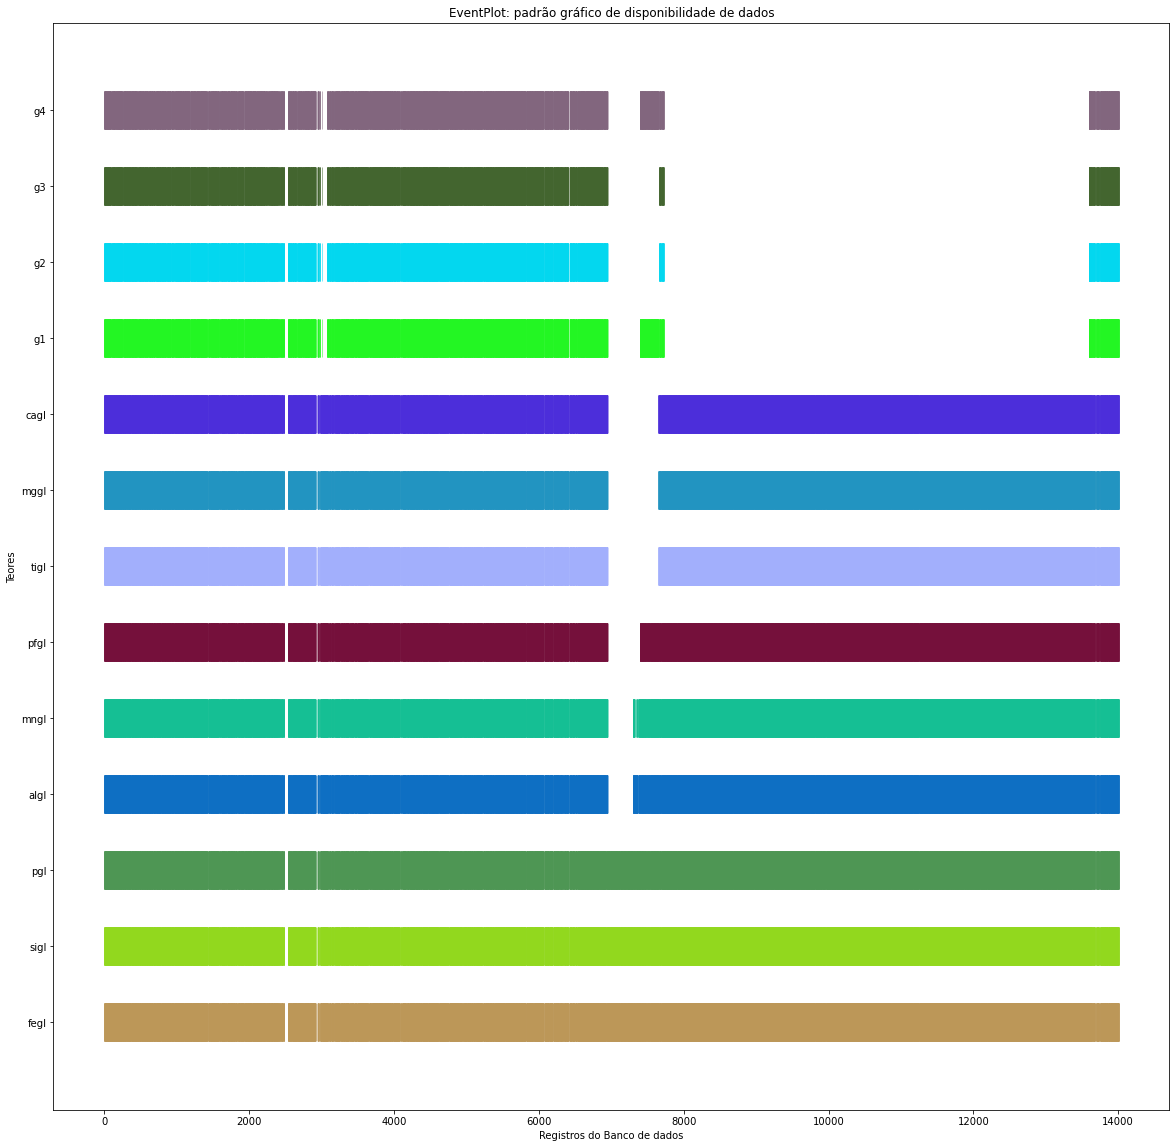

In [27]:
fig = plt.pyplot.figure(figsize=(20,20))  # sets the window to 8 x 6 inches
valid = []
for t in param_event:
    valid.append(df_event.index[pd.notna(df_event[t])])

plt.pyplot.eventplot(valid, color=mycolors, linelengths = 0.5, linewidth = 0.5)

plt.pyplot.title('EventPlot: padrão gráfico de disponibilidade de dados')
plt.pyplot.yticks(ticks, param_event)
plt.pyplot.xlabel('Registros do Banco de dados')
plt.pyplot.ylabel('Teores')
plt.pyplot.show()

fig.savefig('eventplot_data_avaiable.jpeg', transparent=None)

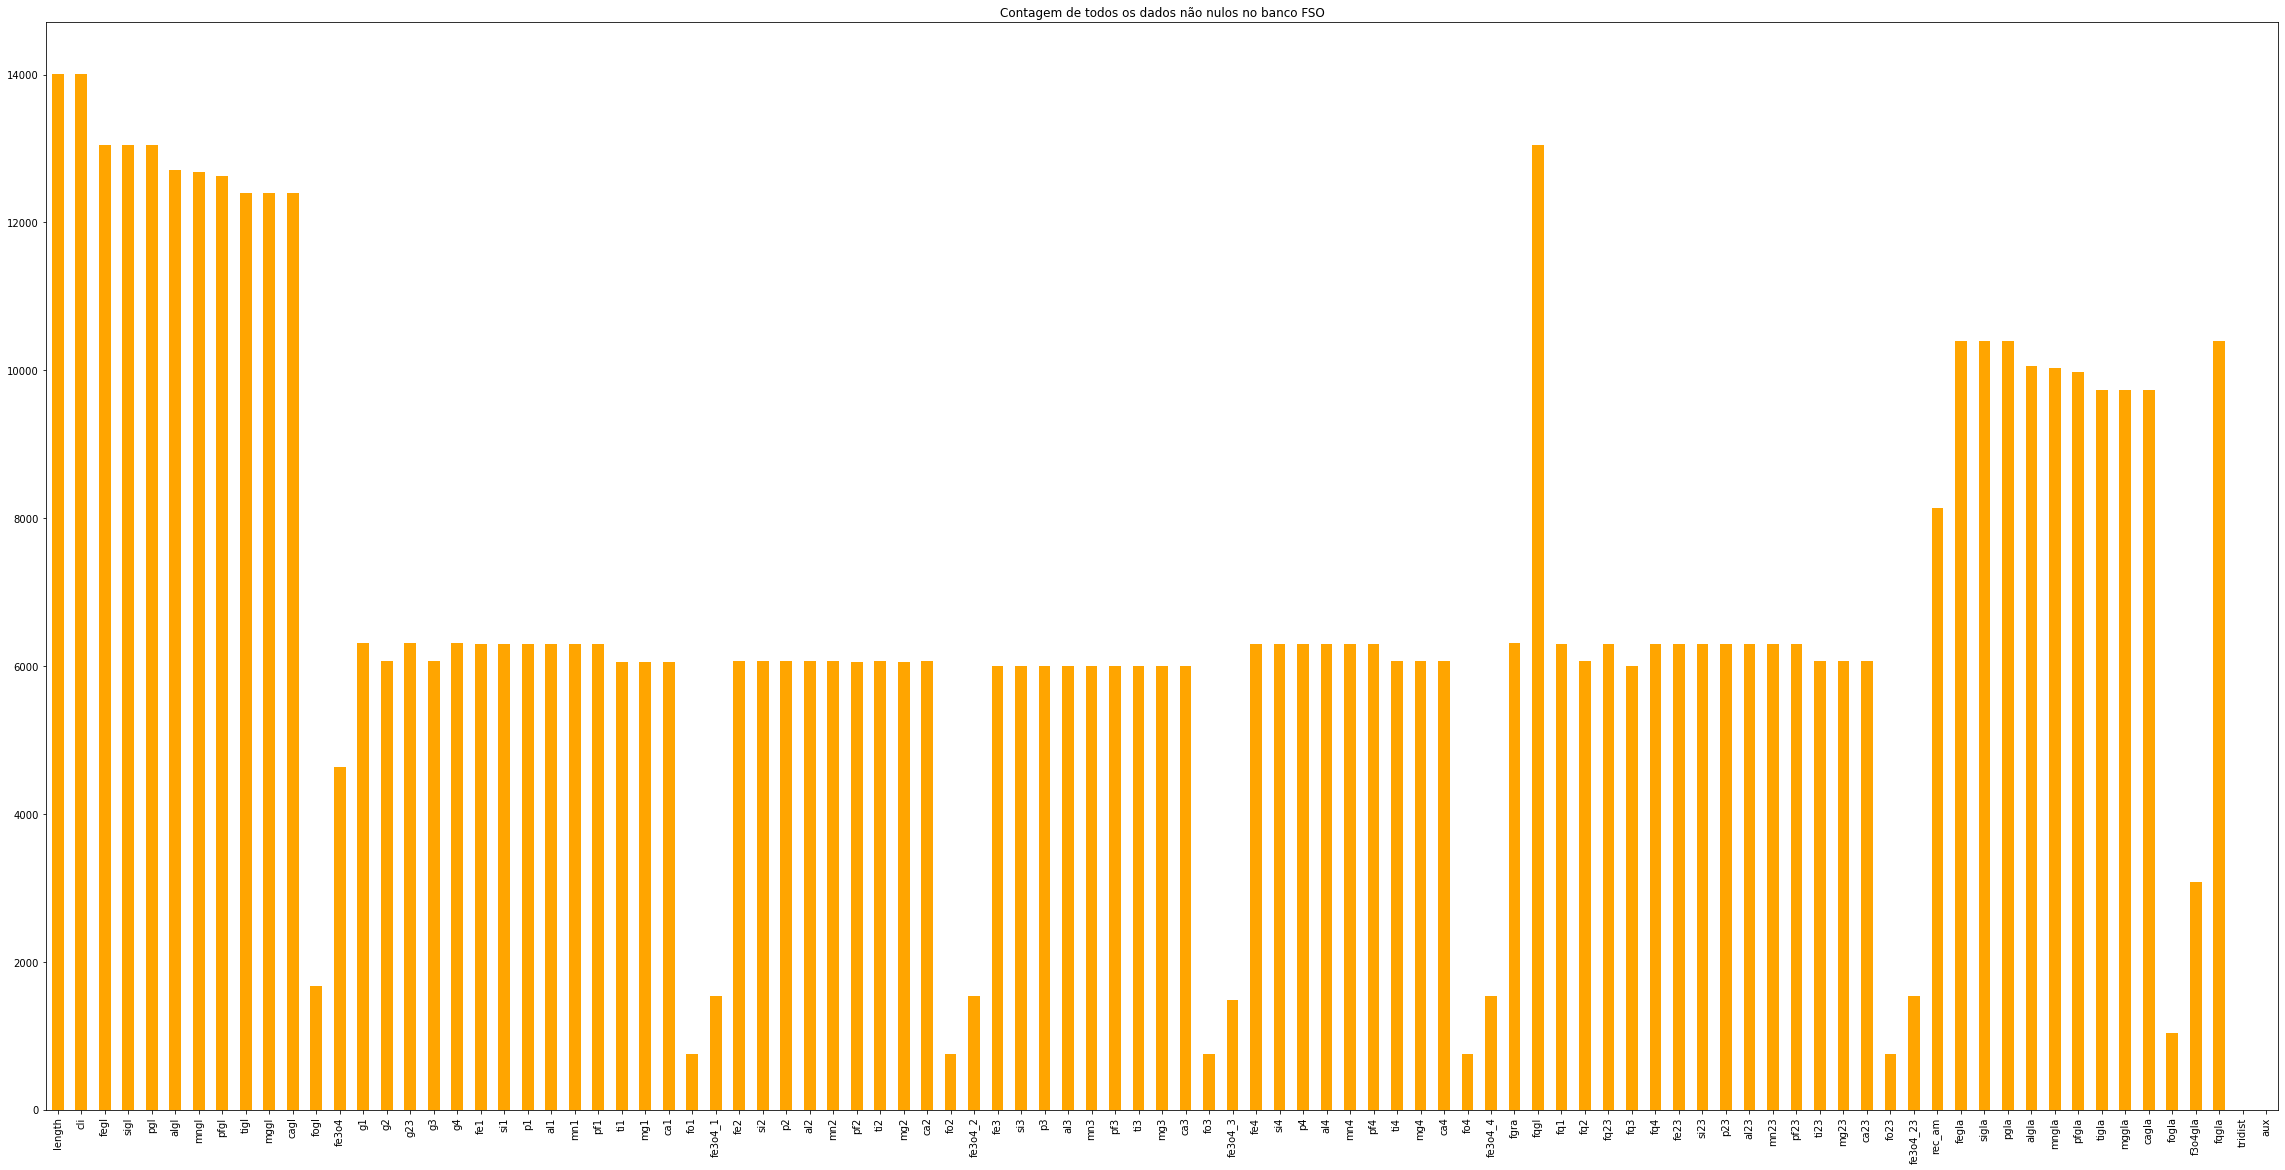

In [28]:
fig = plt.pyplot.figure(figsize=(40,20)) 

plt.pyplot.title('Contagem de todos os dados não nulos no banco FSO')
fso.loc[:, ~fso.columns.isin(not_countable)].count().plot.bar(color='orange')
fig.savefig('teores_total_counts.jpeg', transparent=None)

In [29]:
df_box = fso.loc[0:, 'cli':'g4']

In [30]:
df_box2 = df_box[~df_box['cli'].isin(['AT', 'SR', 'VQ', 'DT', 'RO_L'])]

In [31]:
df_box3 = df_box[df_box['cli'].isin(cover + str_ore)]

## Creating Boxplots for all Rocks:

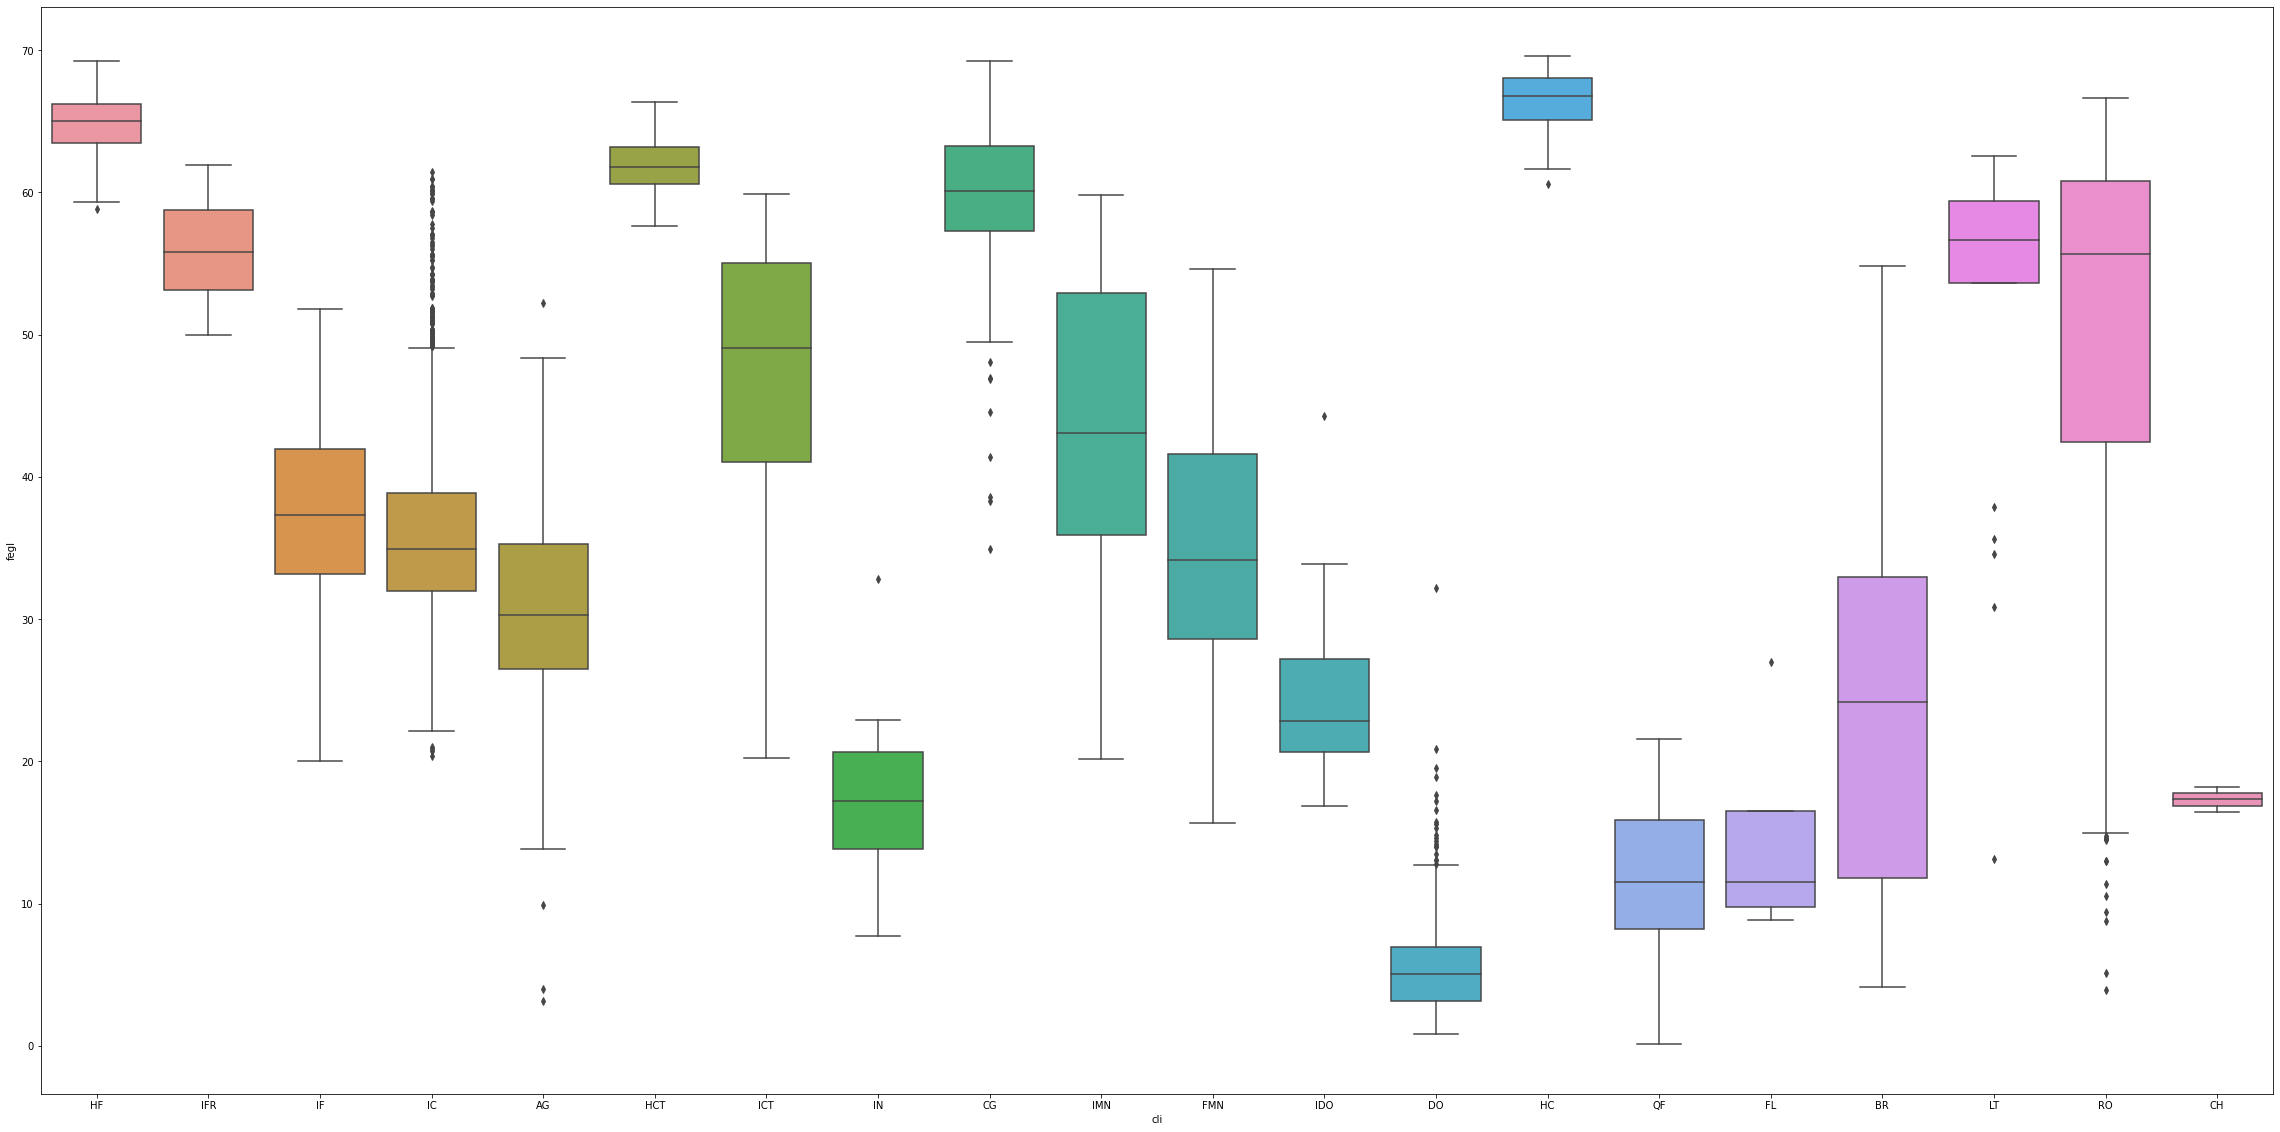

In [32]:
fig = plt.pyplot.figure(figsize=(40,20)) 
feglbox = sea.boxplot(x="cli", y="fegl", data=df_box2)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_fegl.jpeg', transparent=None)

## Ore Boxplots

## Fegl

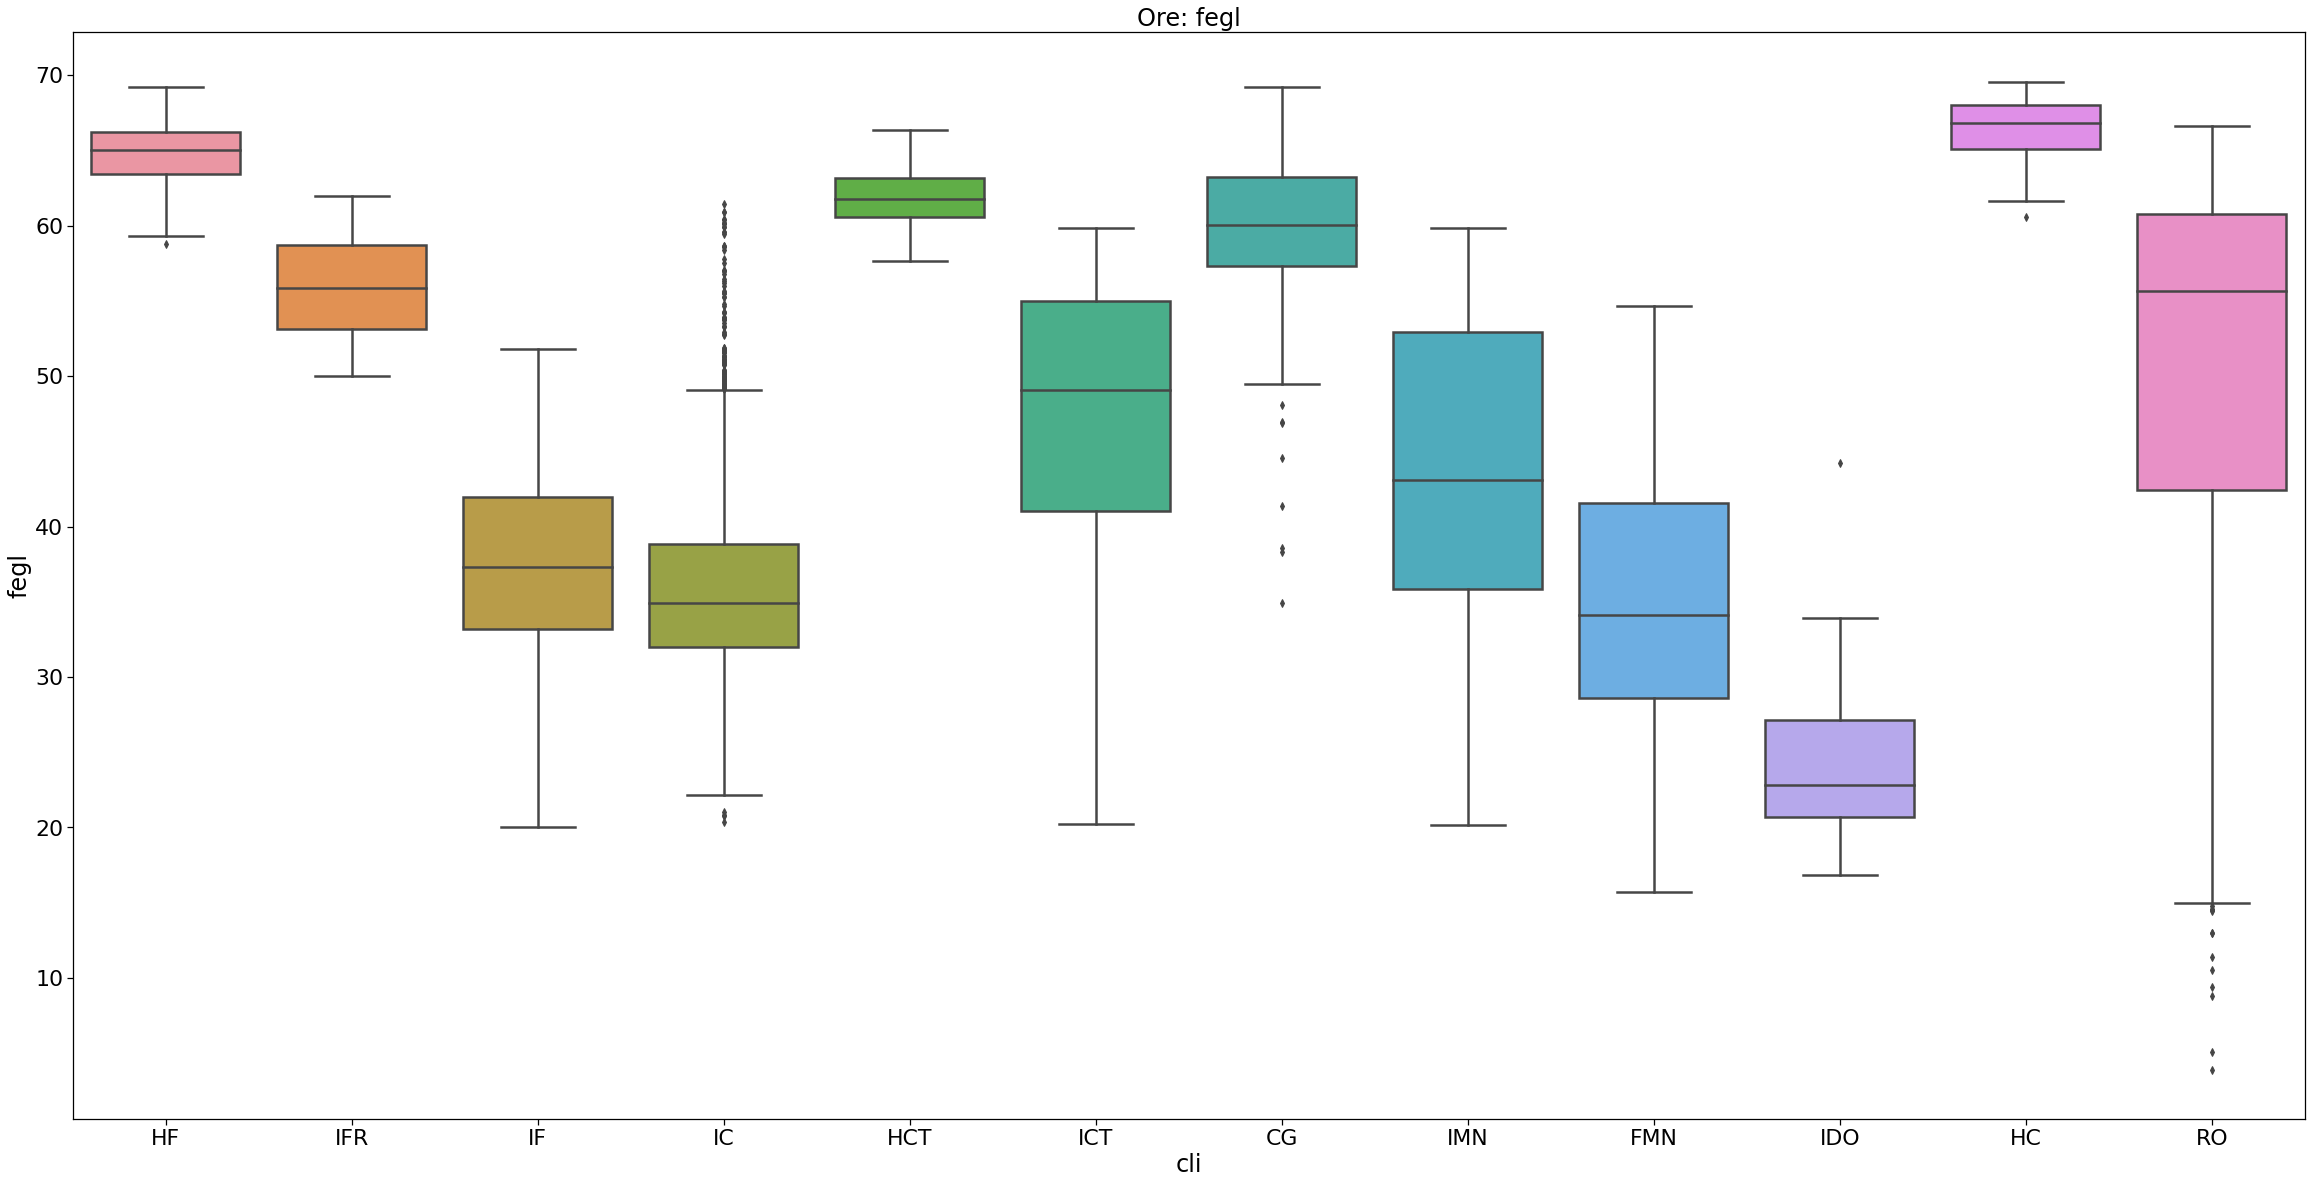

In [33]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'fegl'
feglbox = sea.boxplot(x="cli", y=gr, data=df_box3)
feglbox.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### We missed the opportunity to better evaluate and manage our blends by omitting and diluting the compact itabirite above 50% Fegl. The blue sea down dip is the rabbit hole.

## Sigl

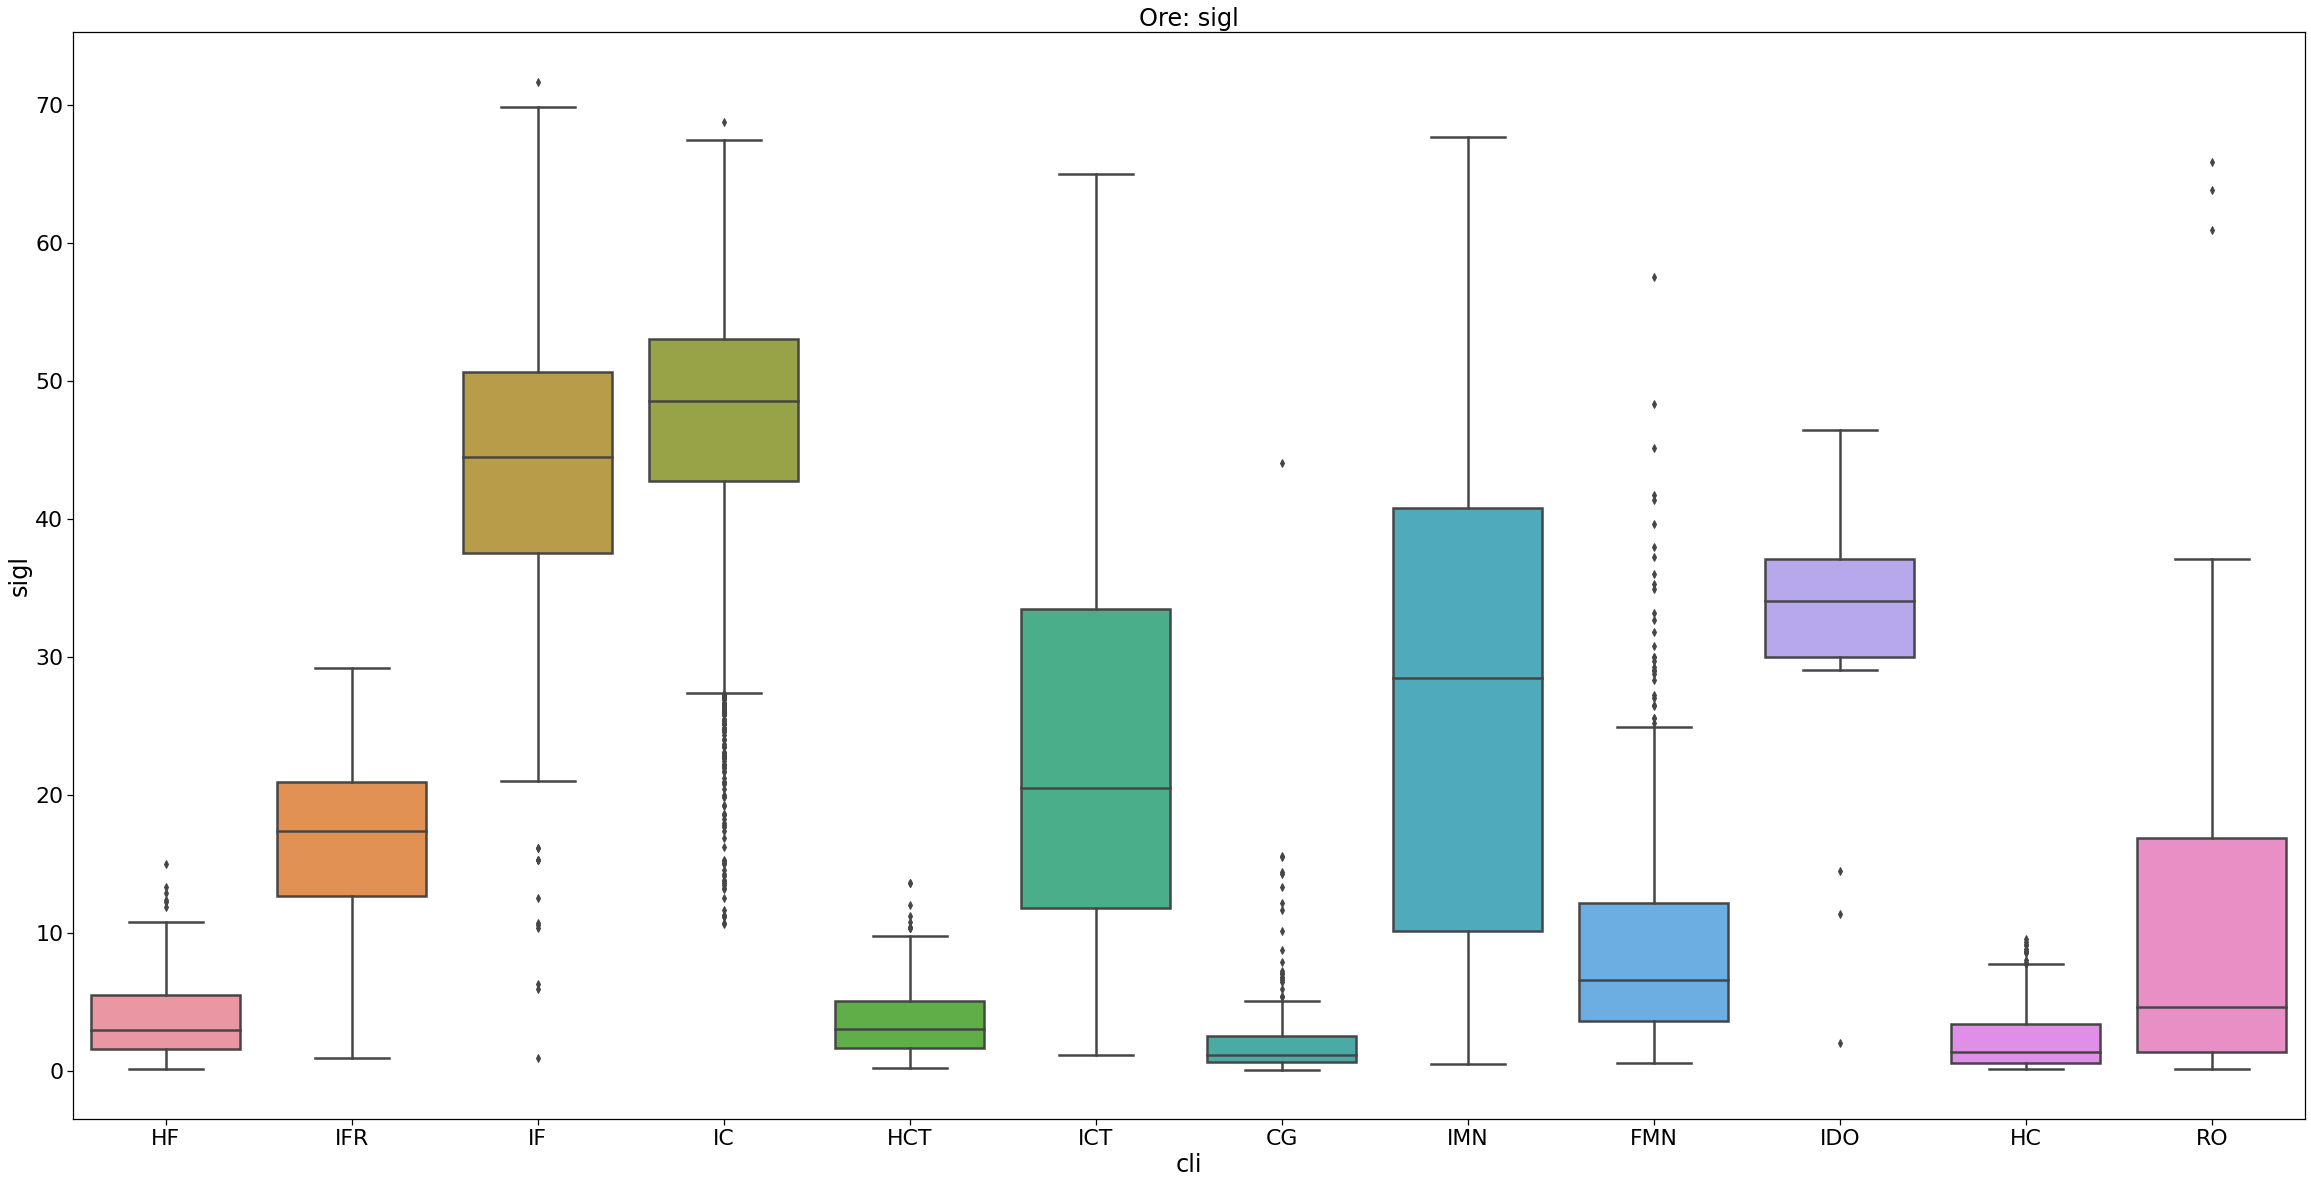

In [34]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'sigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Pgl

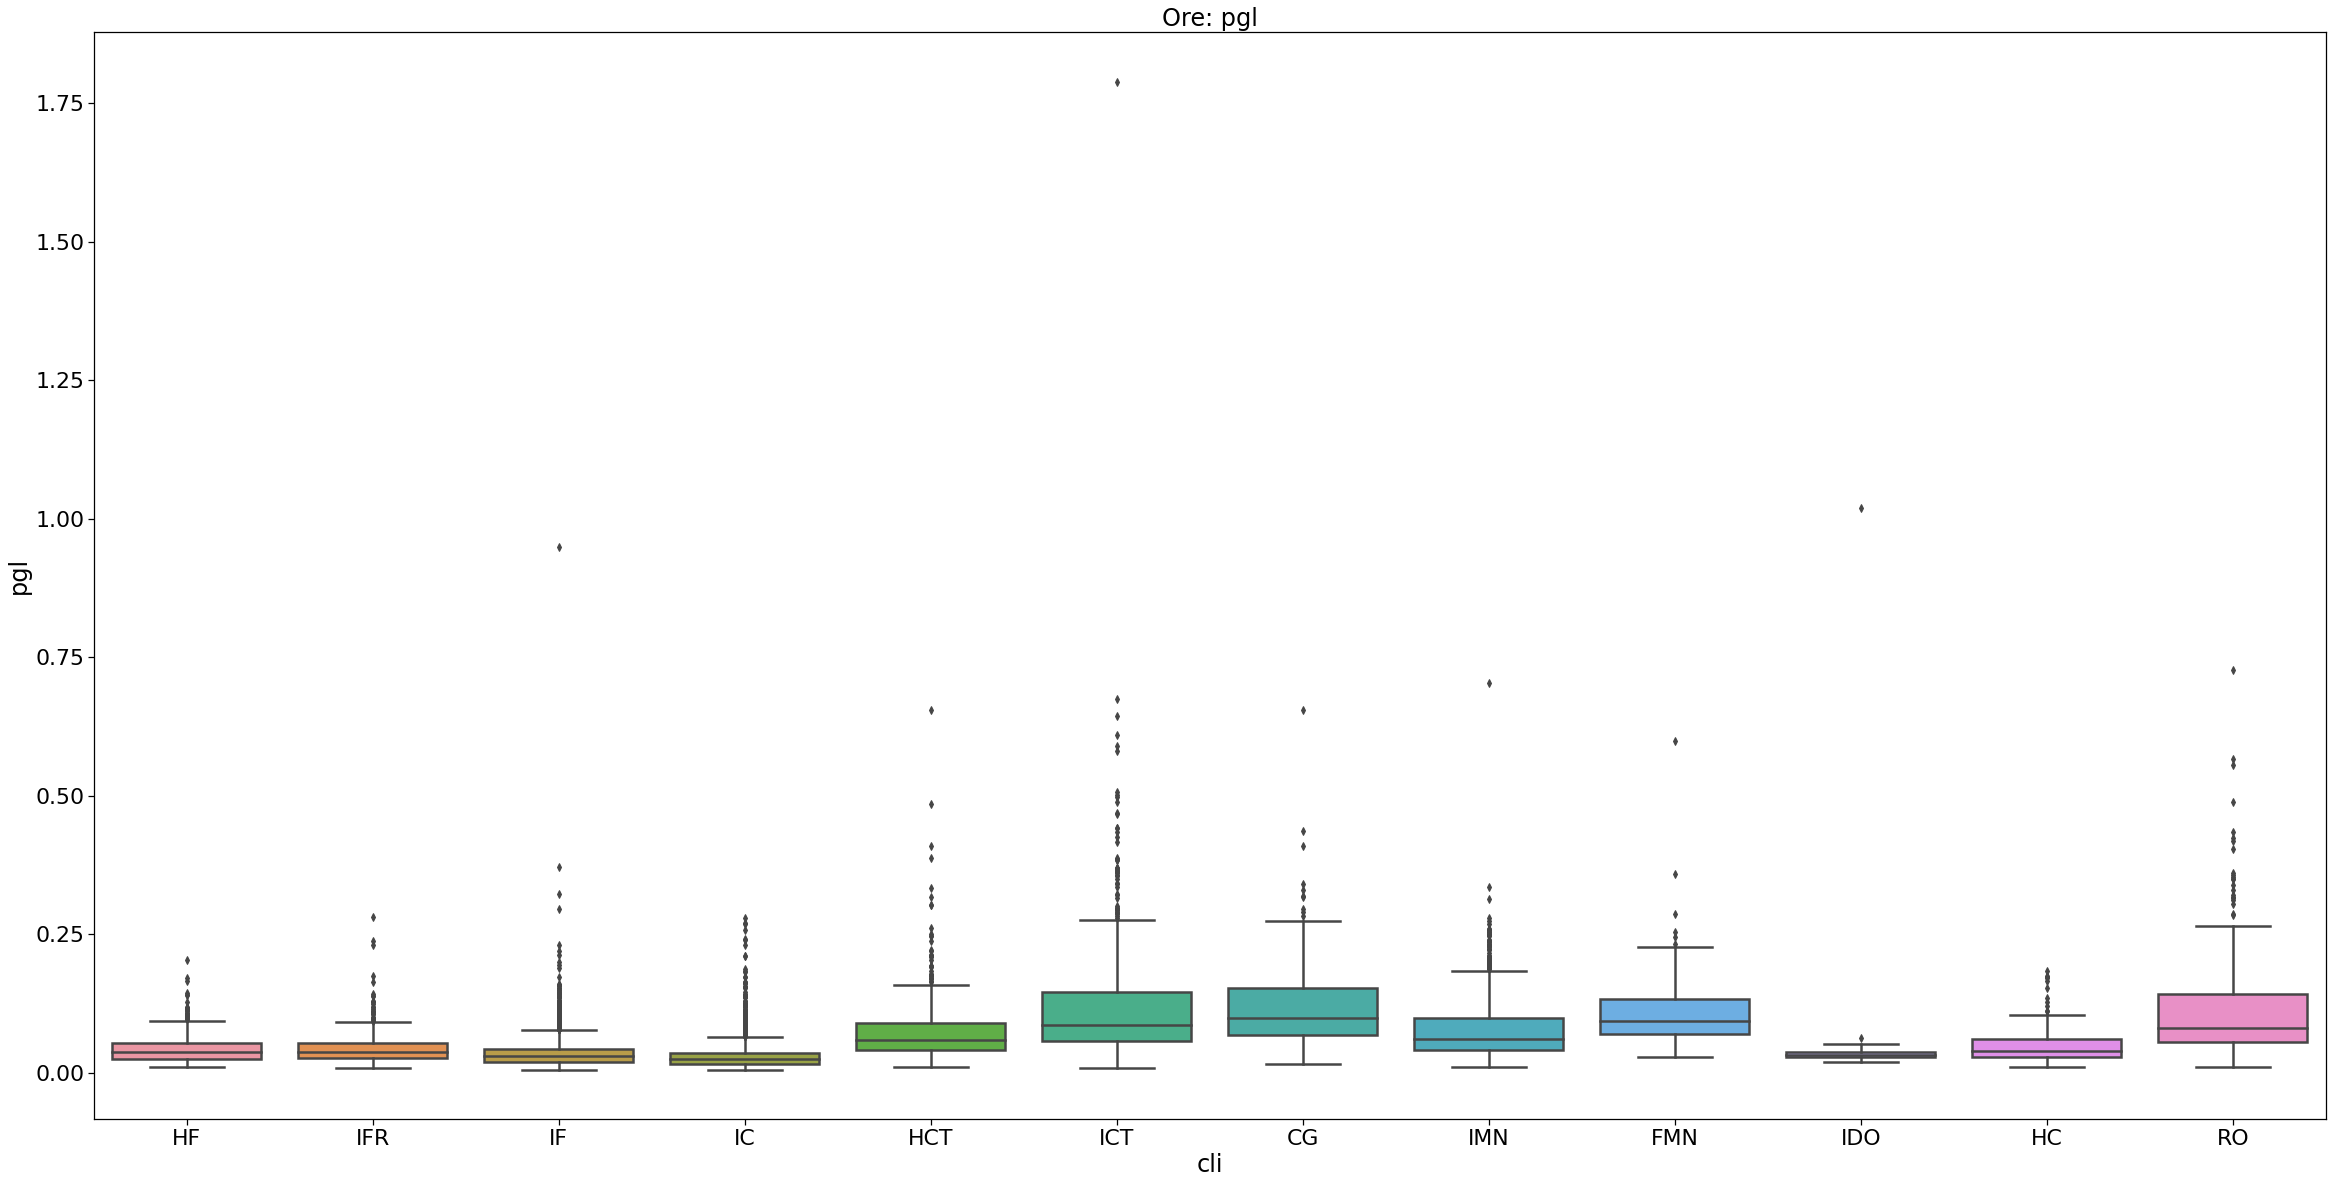

In [35]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Before modeling, check if some extreme pgl values ​​are close to intrusive bodies (hydrothermal contribution?)

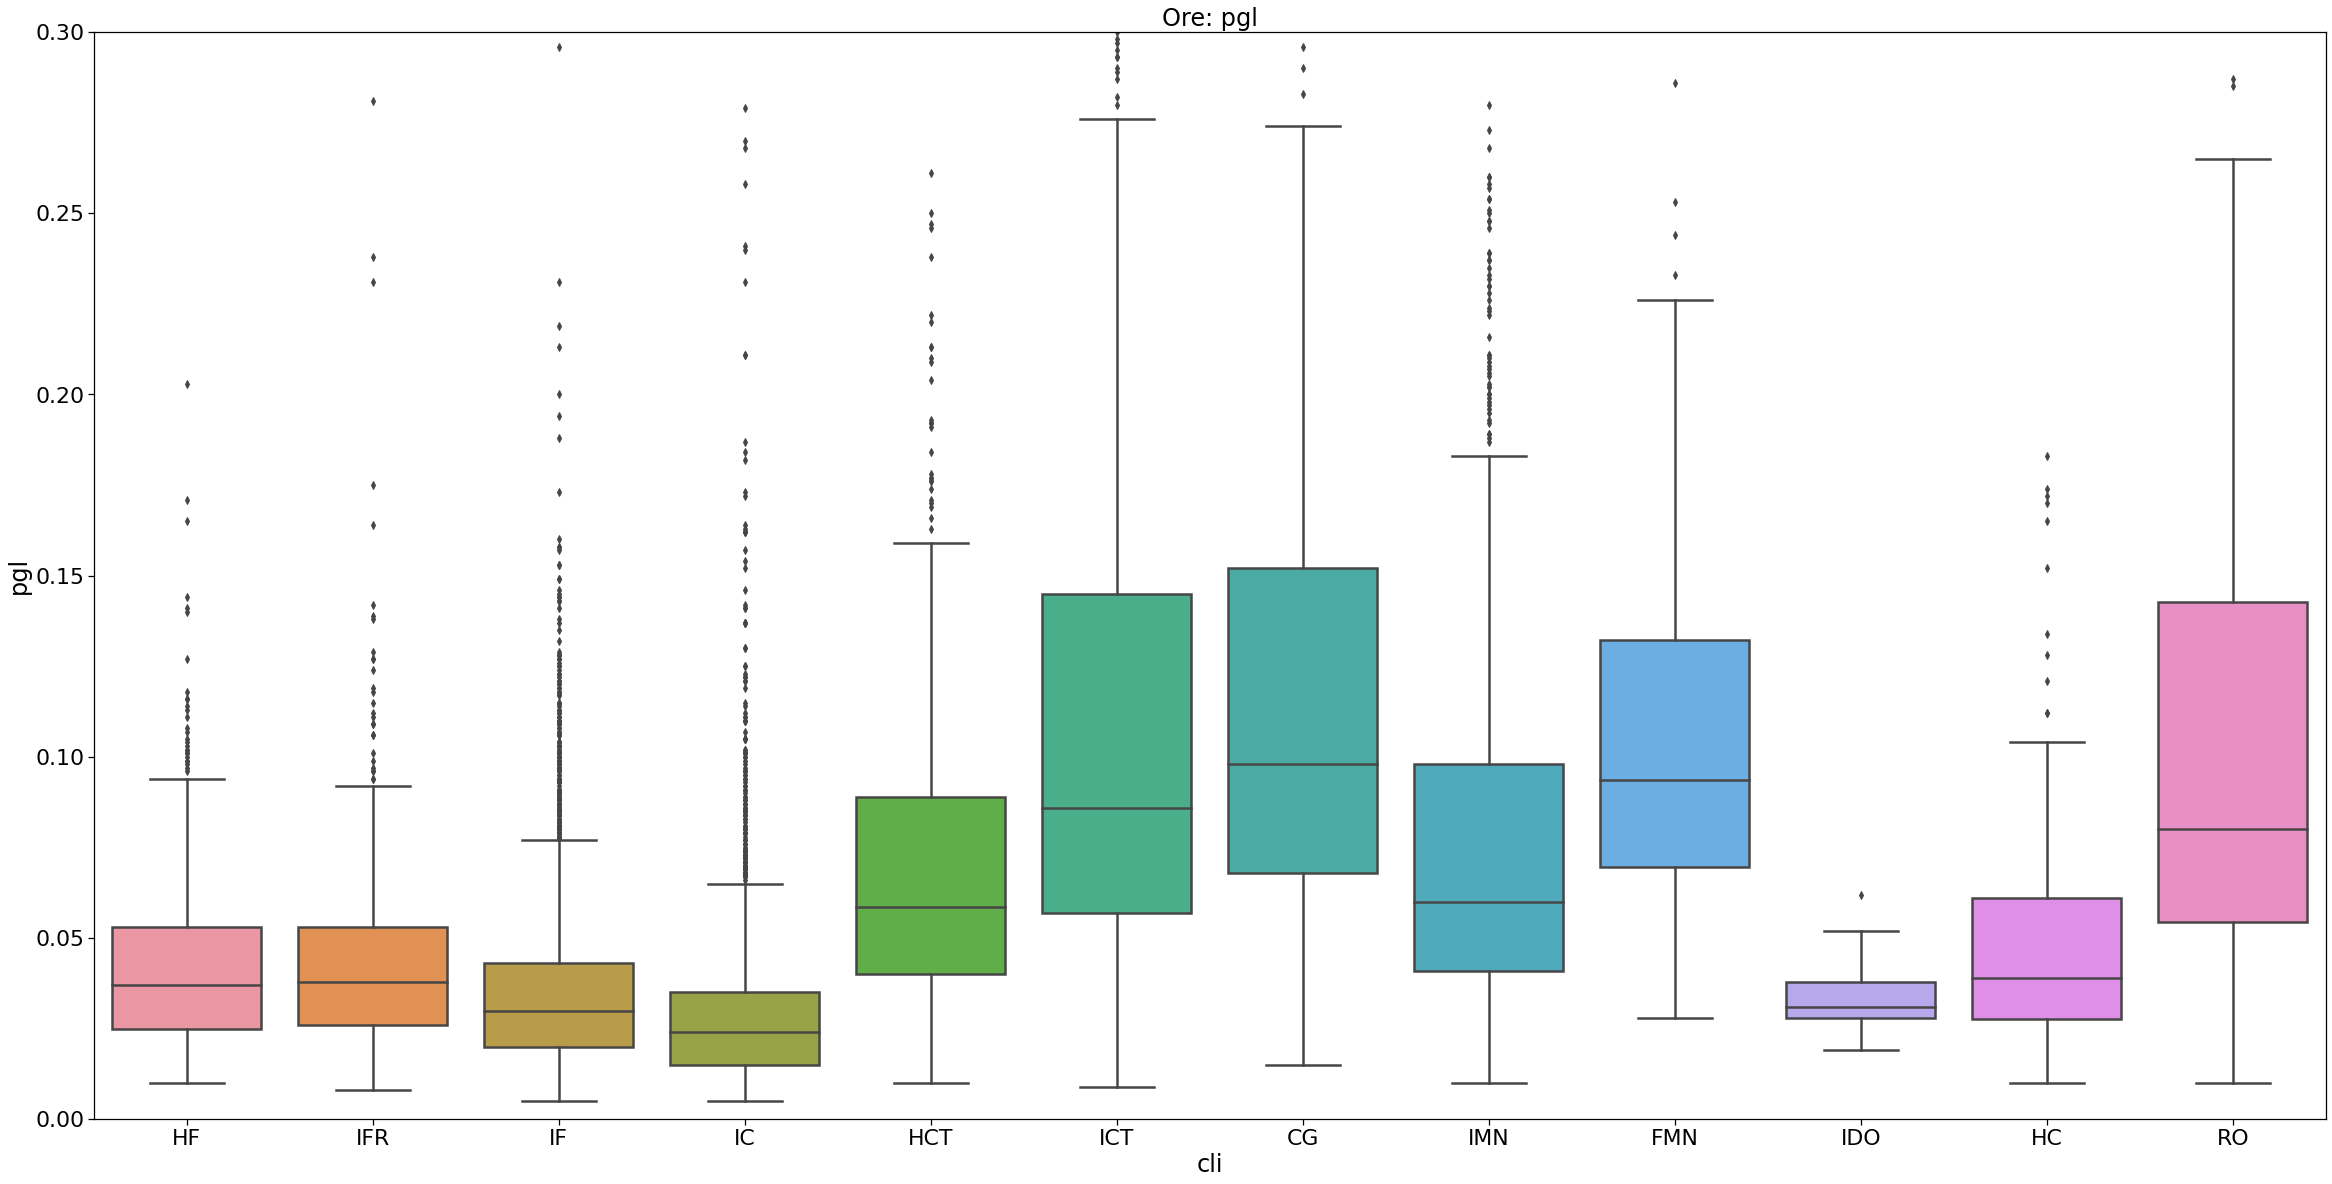

In [36]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
#setting yaxis to emphasize the box
box.set(ylim=(0, 0.3))
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_cl.jpeg', transparent=None)

## Algl

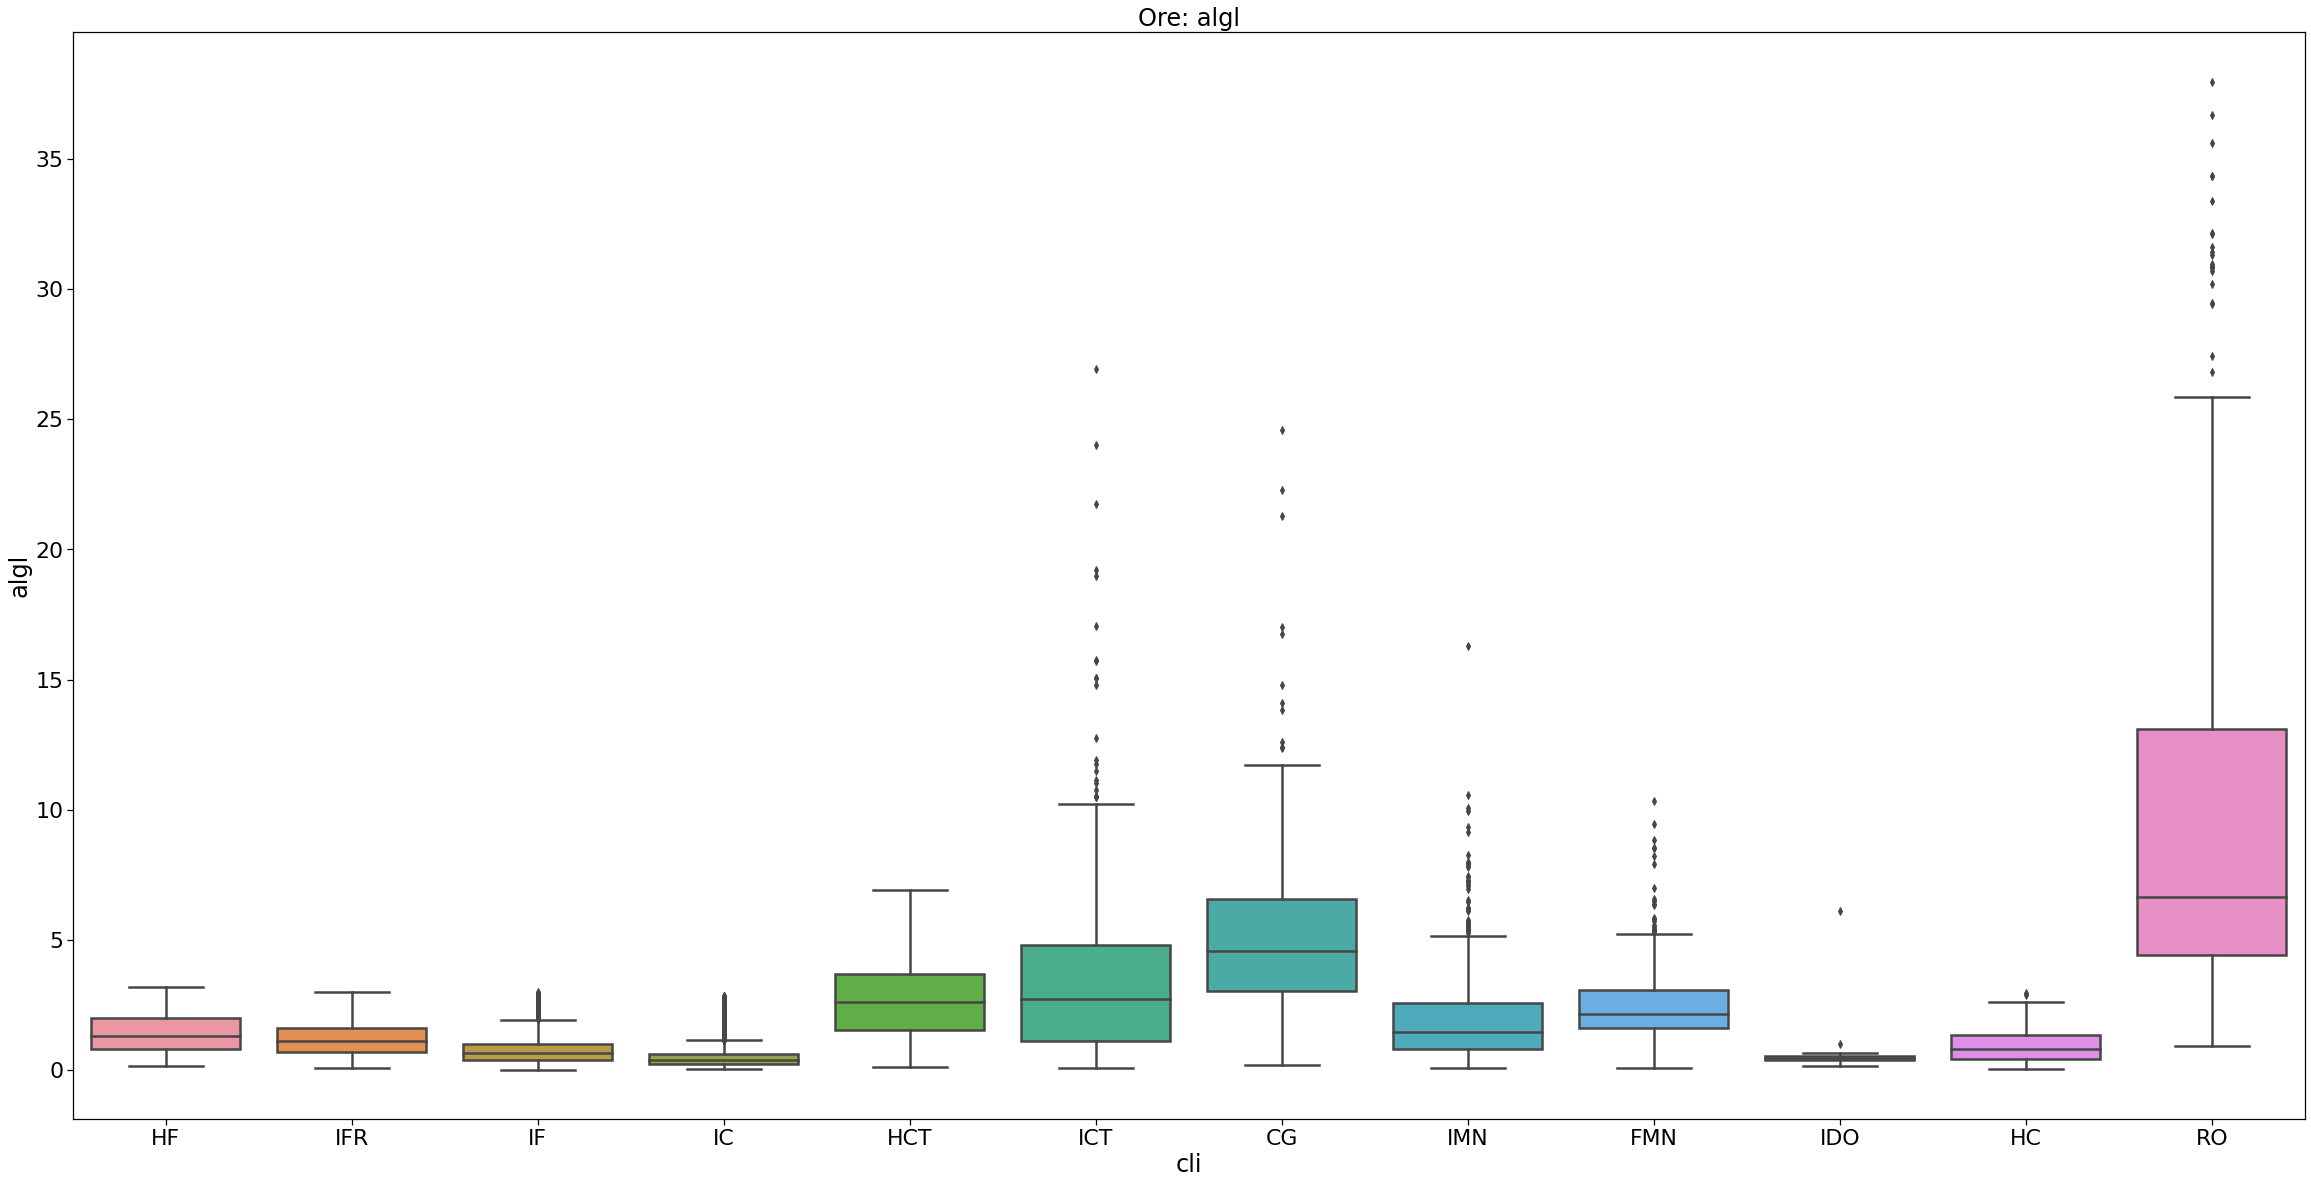

In [37]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'algl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mngl

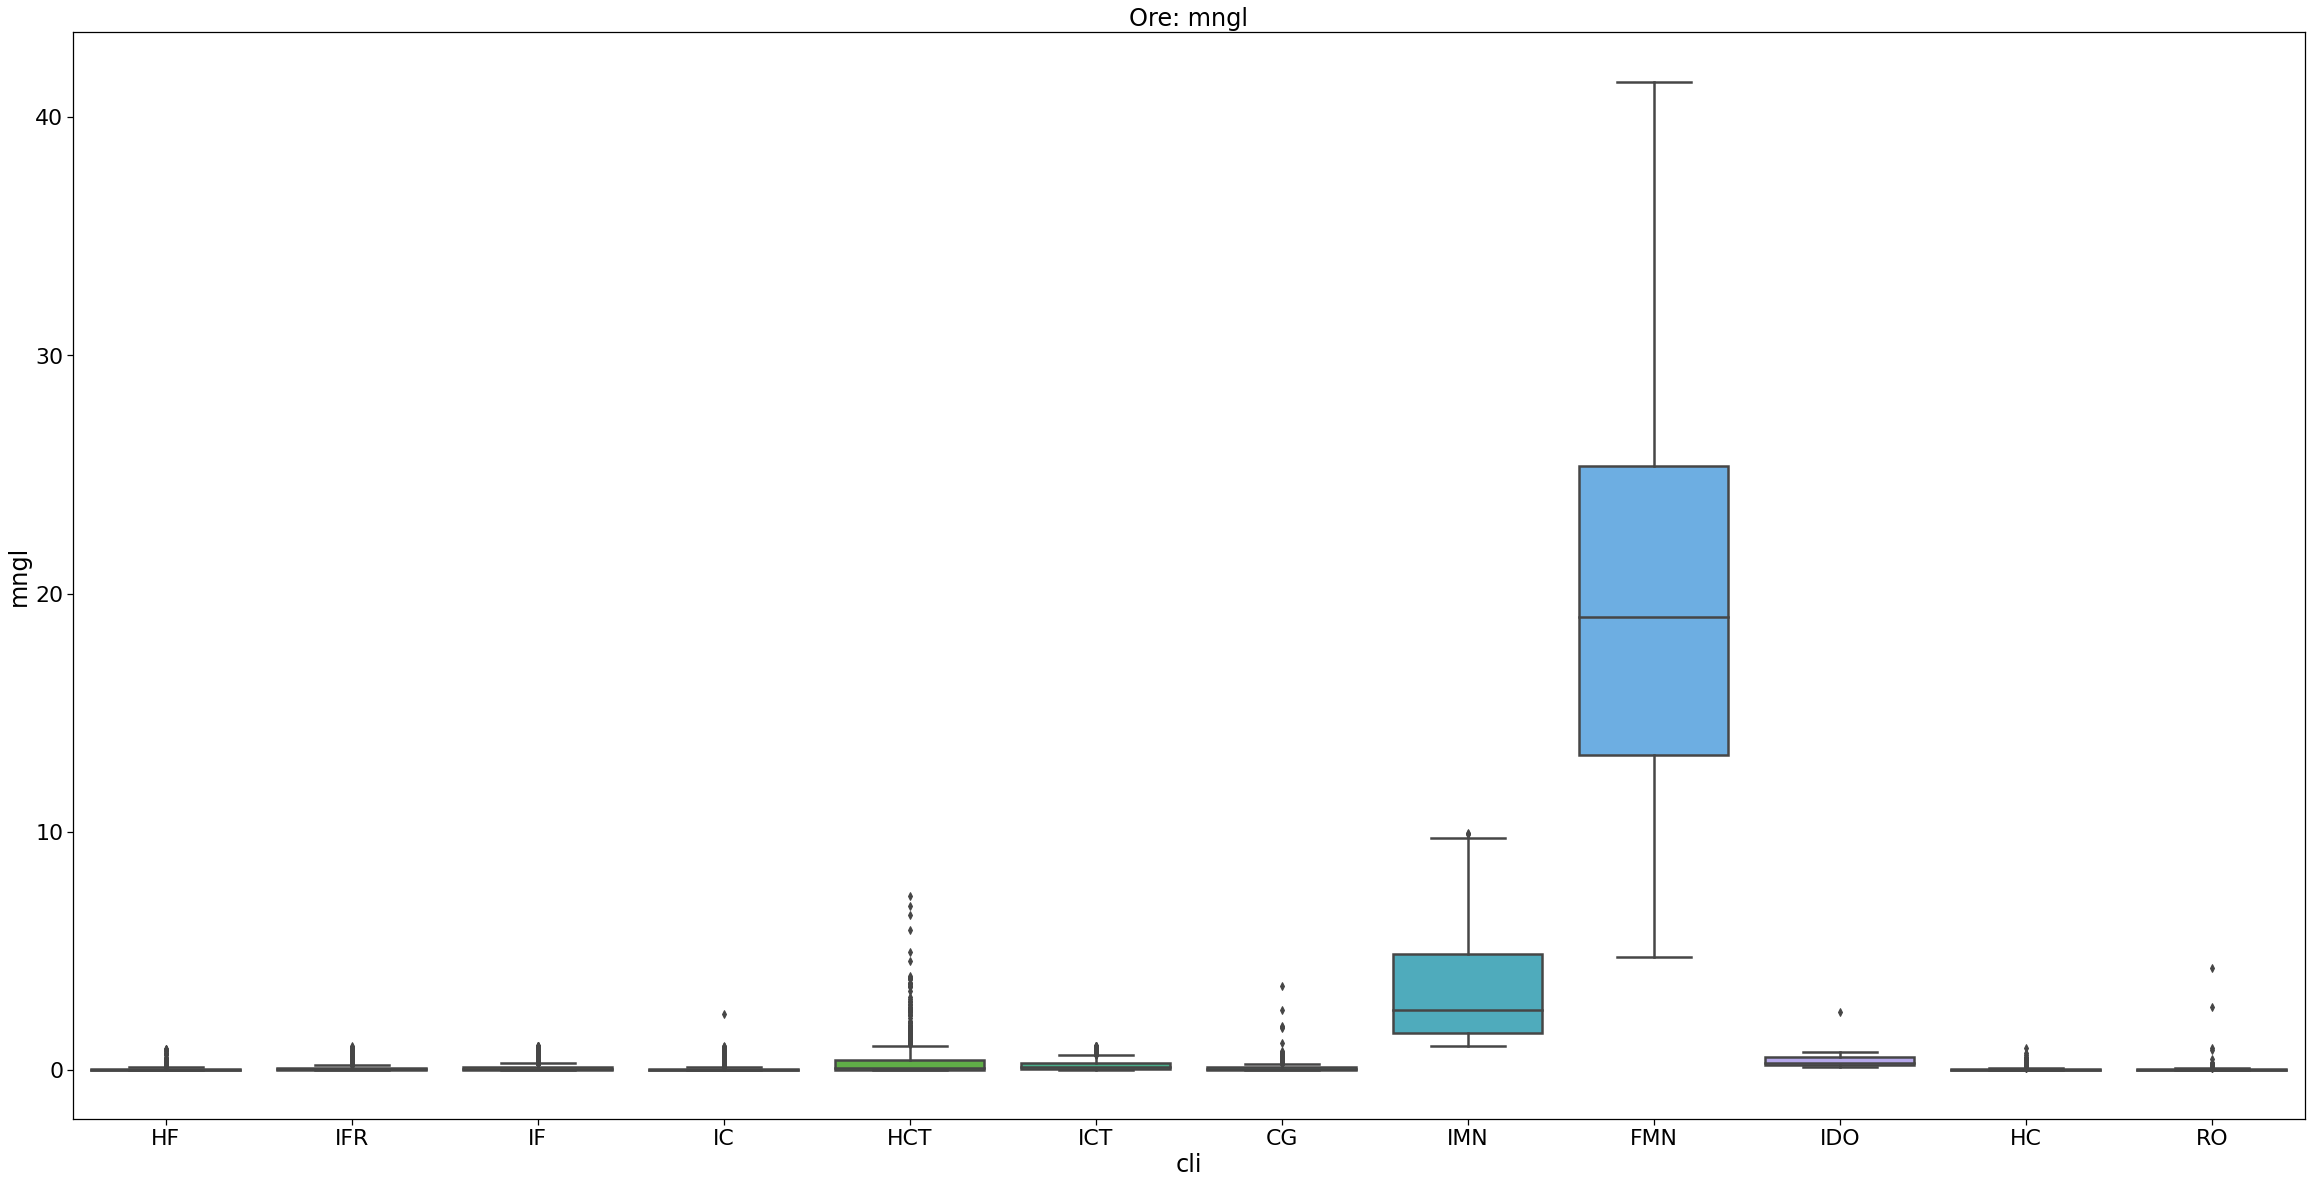

In [38]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### In some situations, the FMN shows manganese grades compatible with the Mn ores in our operations. If these bodies are regionalized and define modelable space, it doesn't take much volume to be compatible with the annual production of Mn. Base for comparison: 3Mwt / year @ 30% Mngl (CKS ROM)

##### Some samples can be located close to chemical traps (high PH + reductive/oxidative water levels), or even litostructural traps (dykes and other barriers)

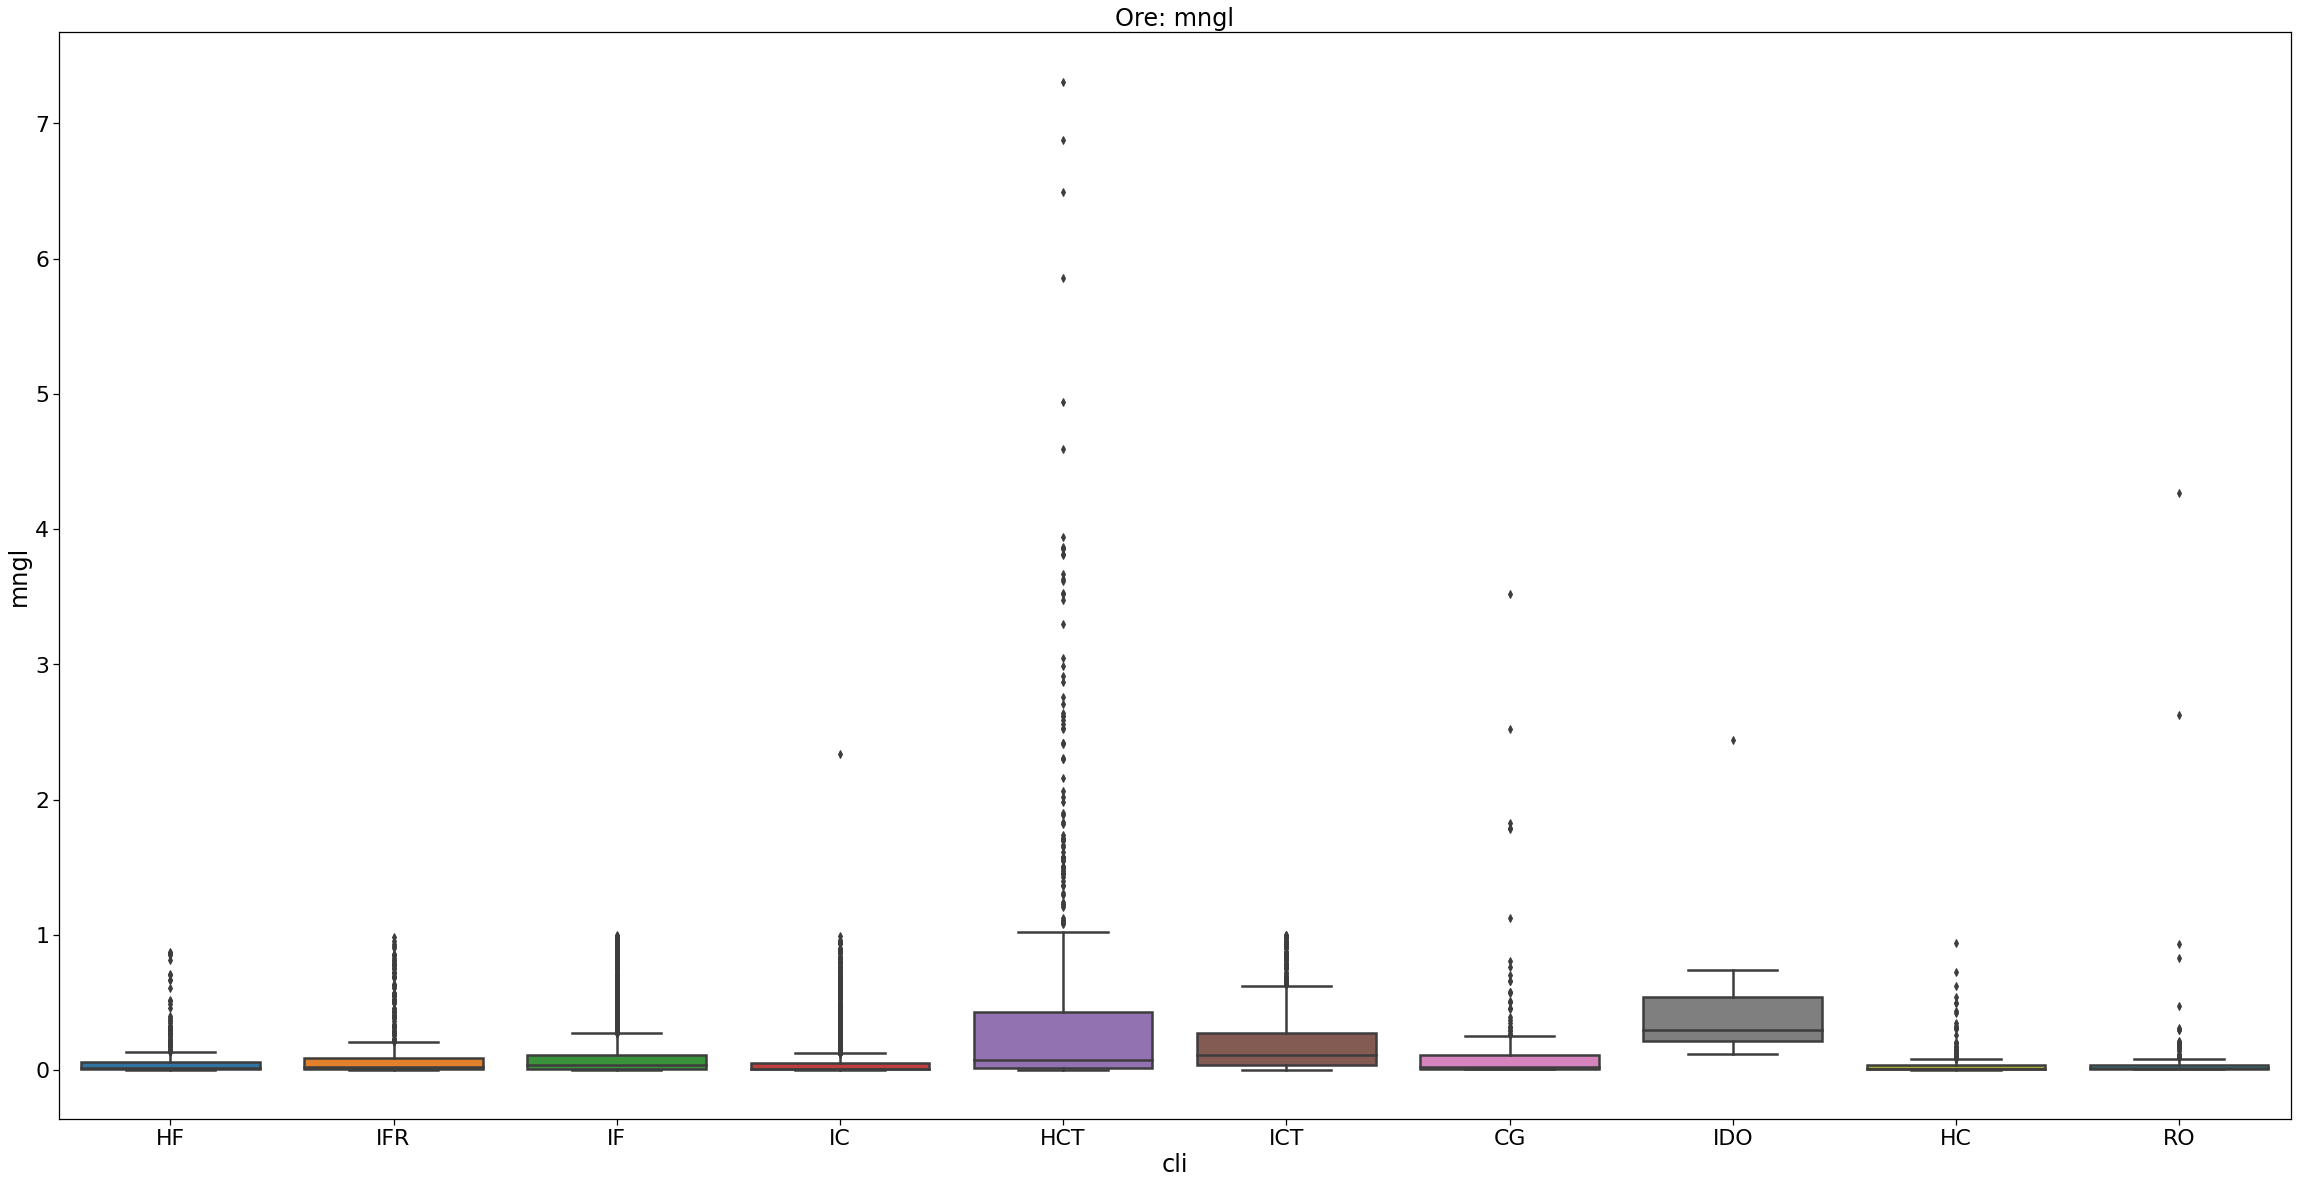

In [39]:
# result is a list, order is preserved
low_mn_rocks = [e for e in ore_rocks if e not in mn_rocks] 

df_box_low_mn = df_box[df_box['cli'].isin(low_mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x="cli", y=gr, data=df_box_low_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_low_mn.jpeg', transparent=None)

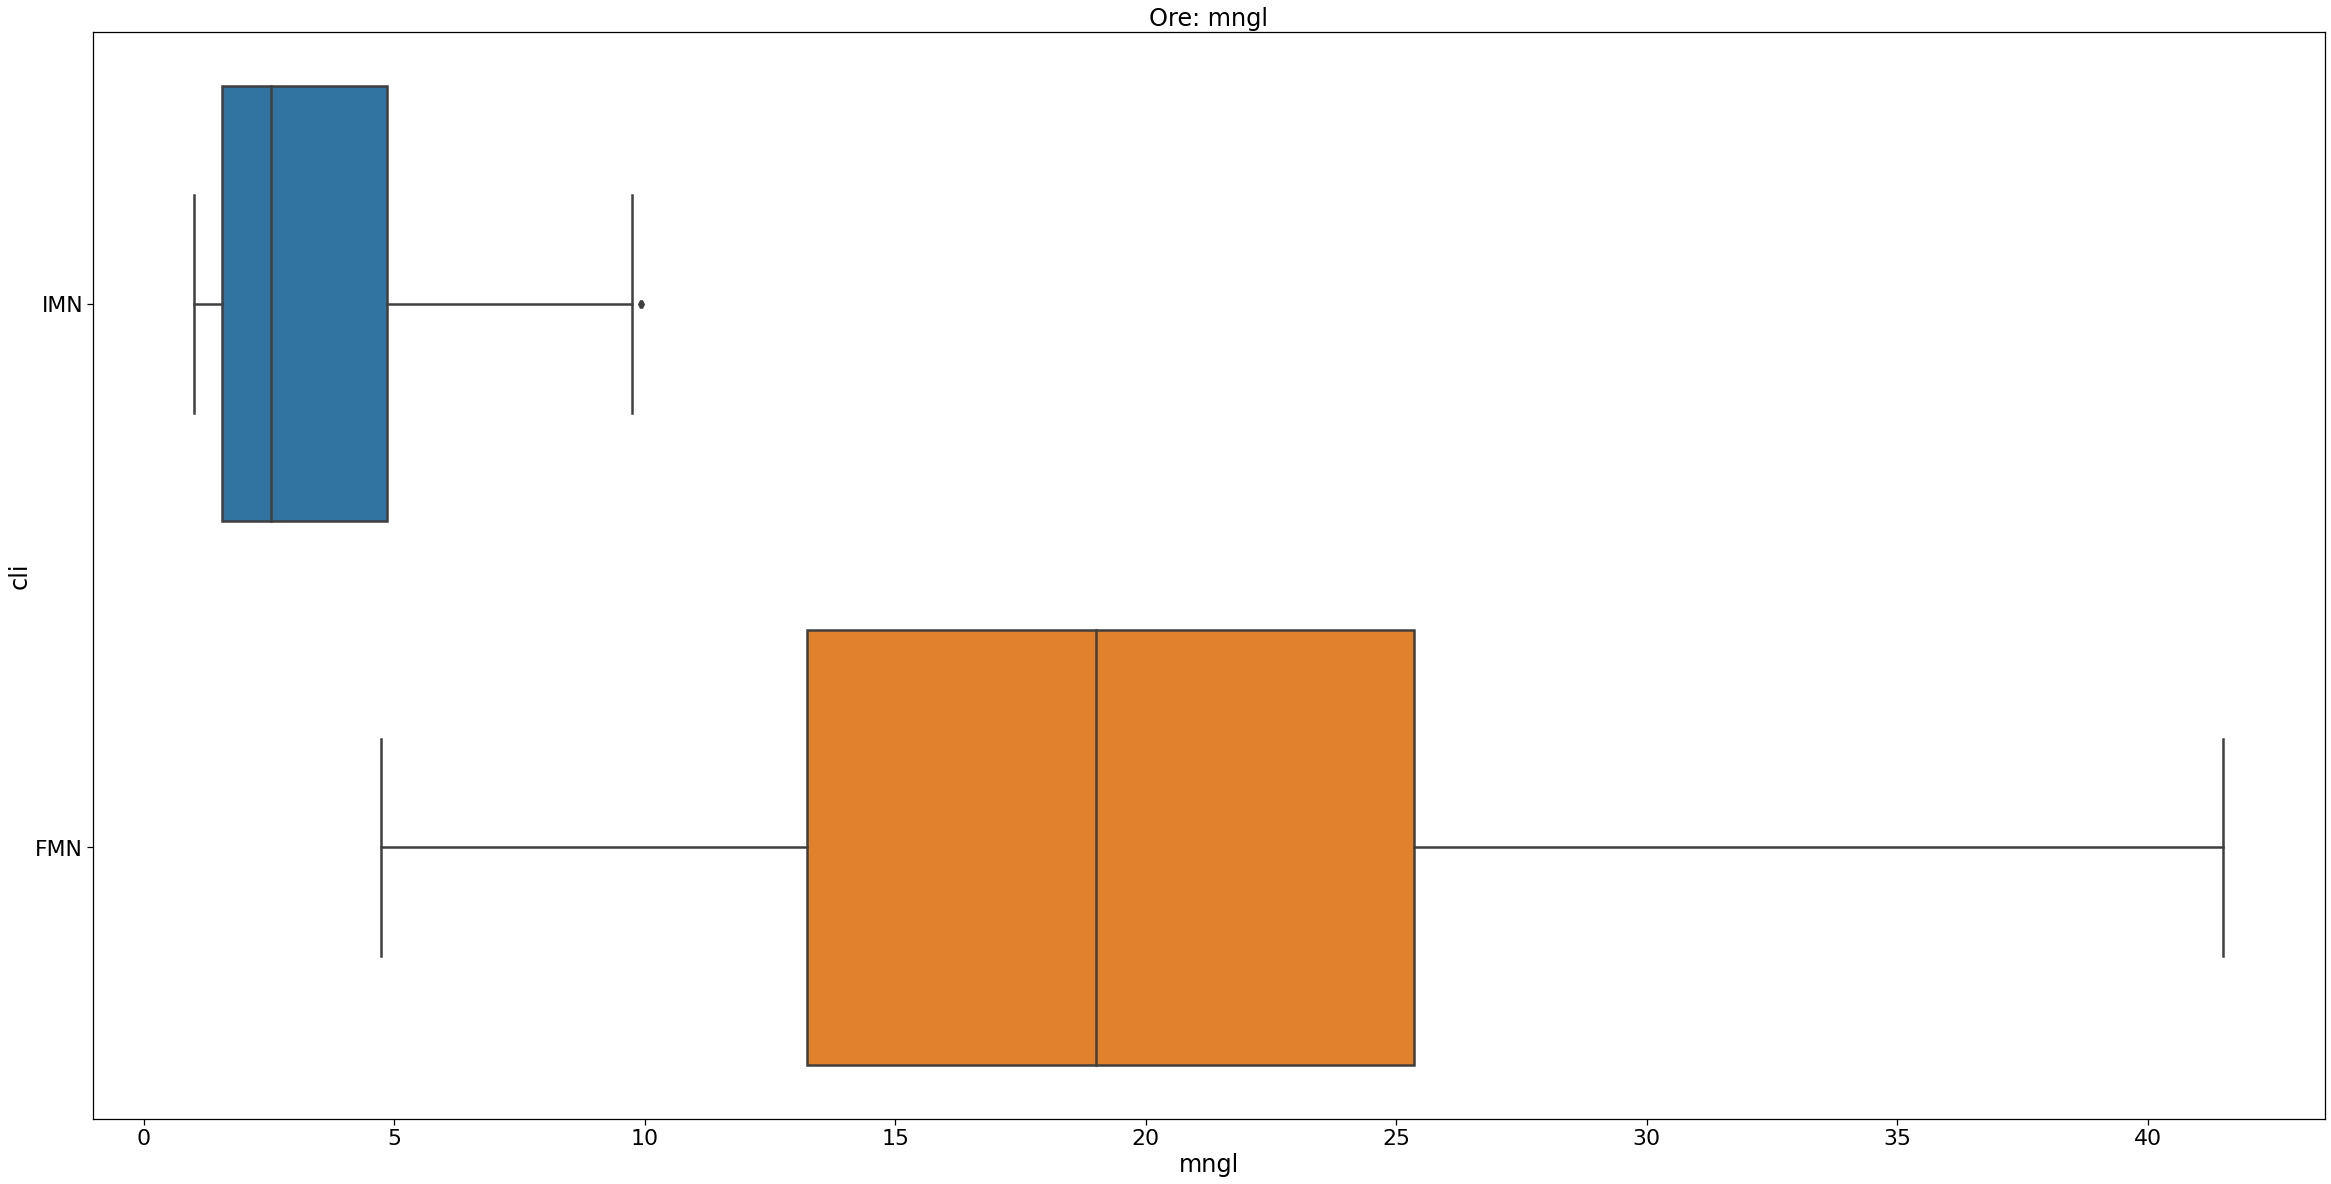

In [40]:
# only high manganese
df_box_mn = df_box[df_box['cli'].isin(mn_rocks)]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mngl'
box = sea.boxplot(x=gr, y="cli",data=df_box_mn)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'_mn_rocks.jpeg', transparent=None)

## Pfgl

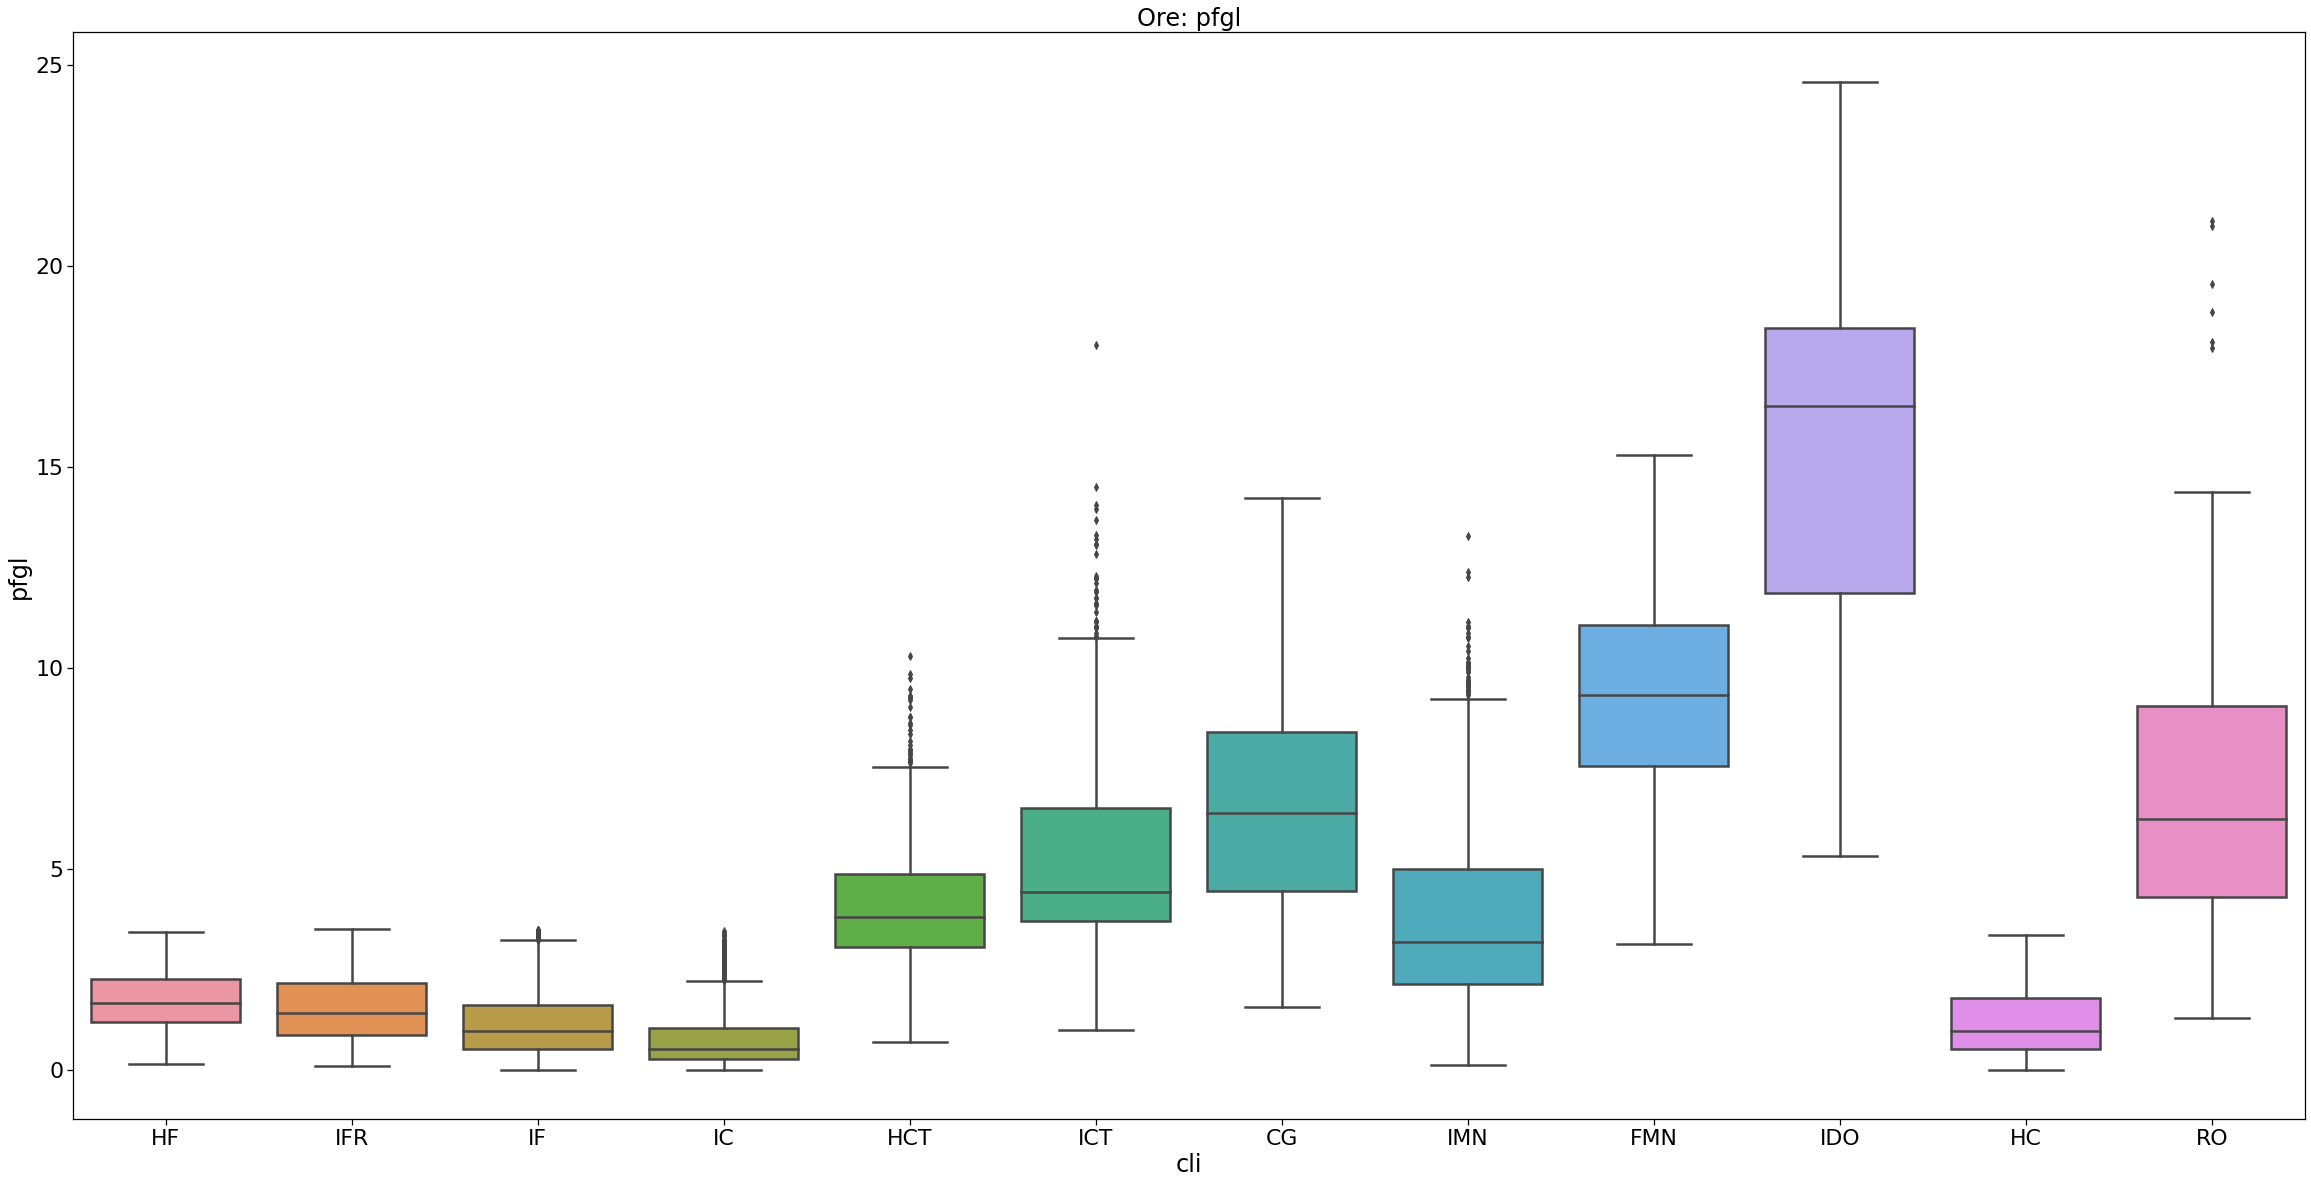

In [41]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'pfgl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)


## Tigl

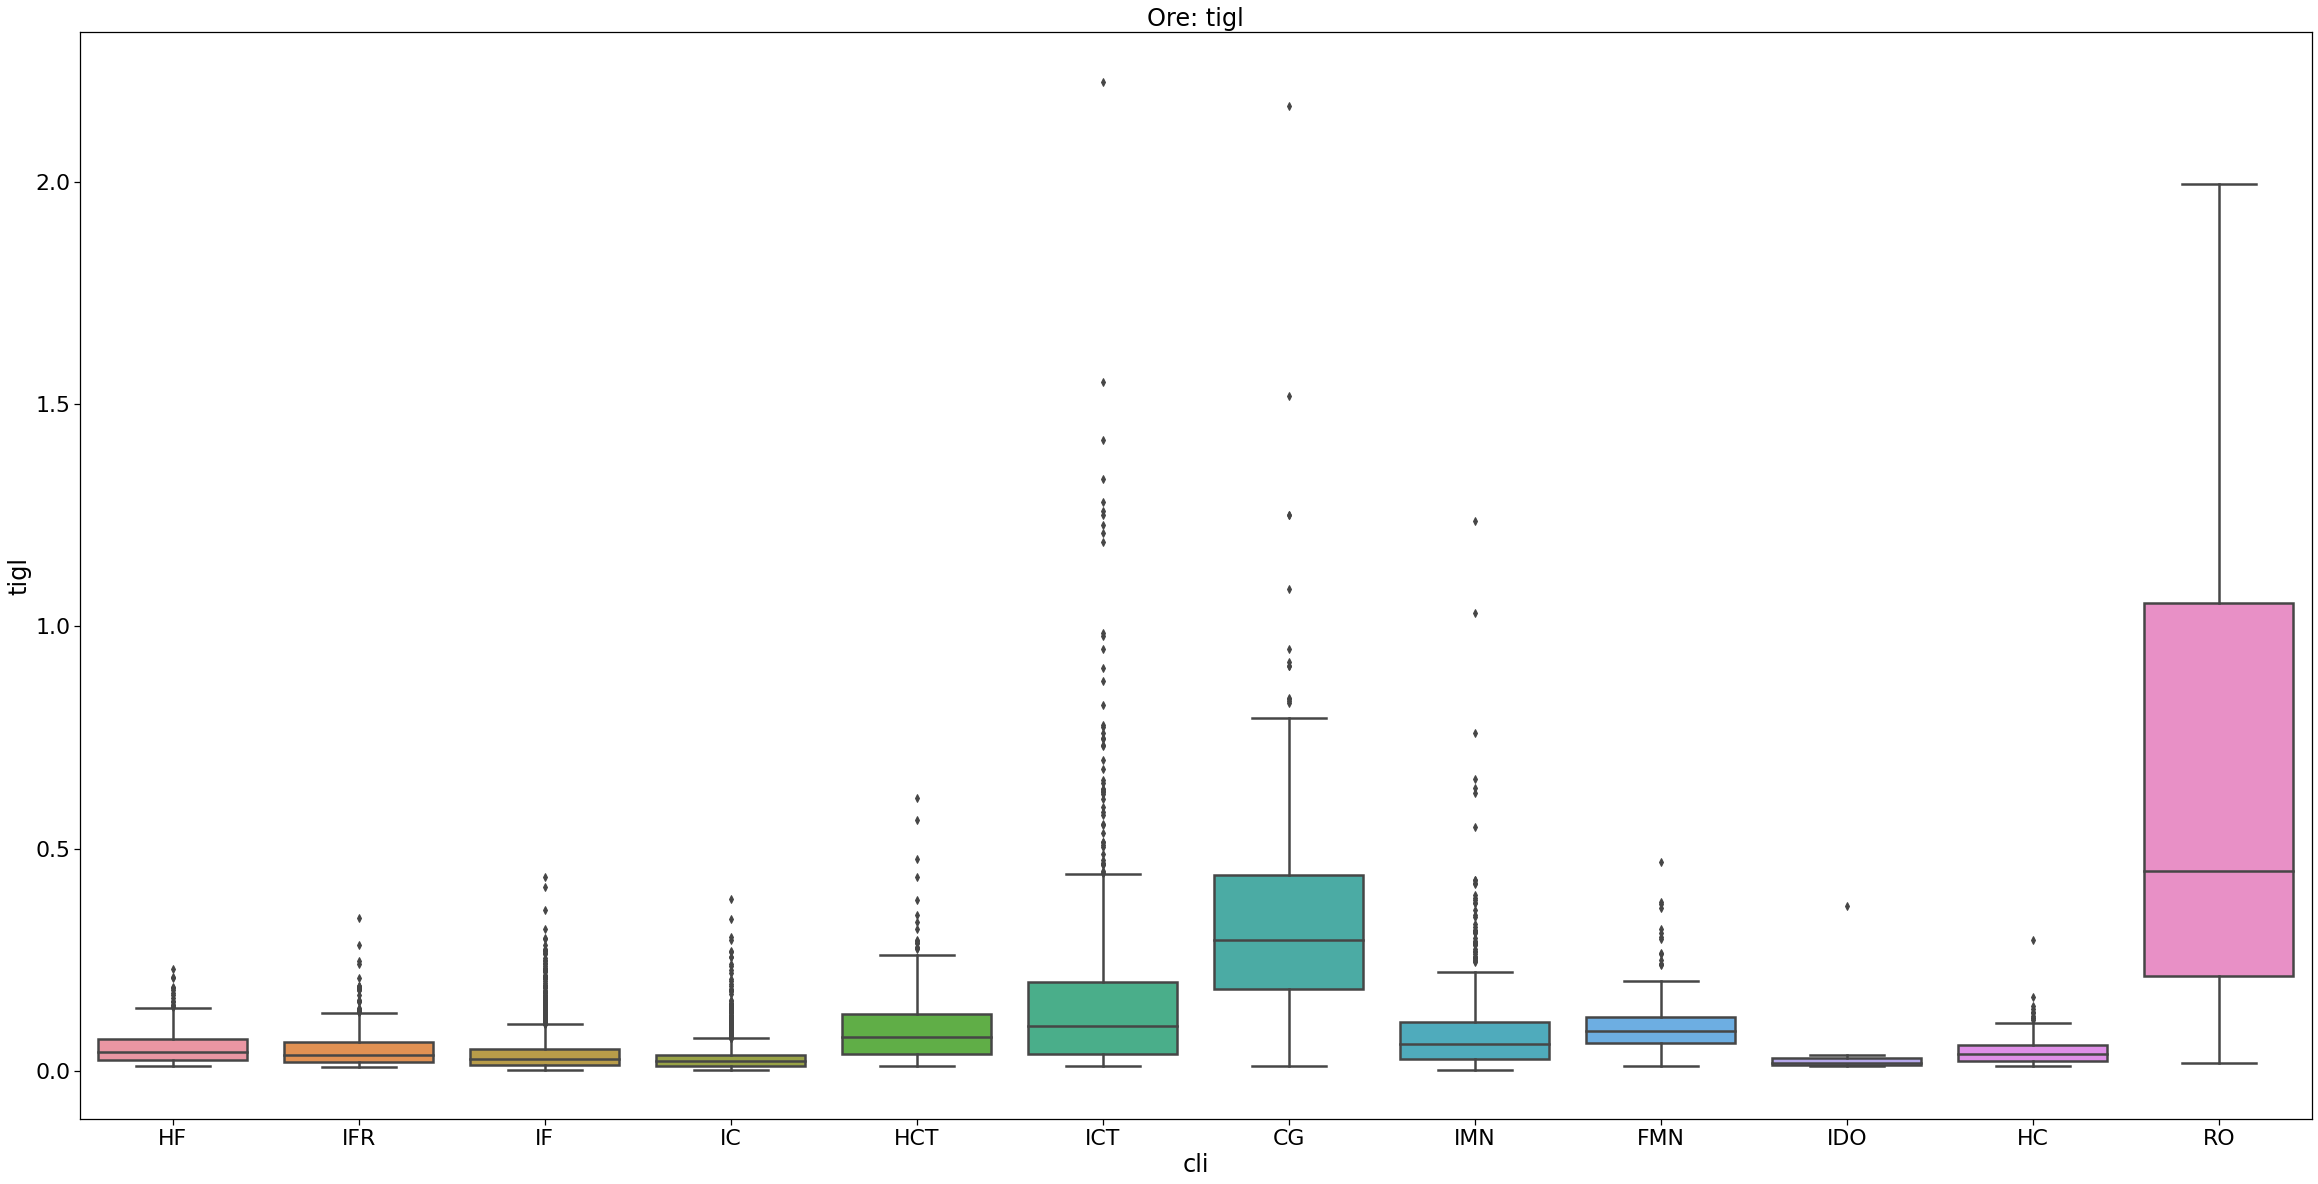

In [42]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'tigl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

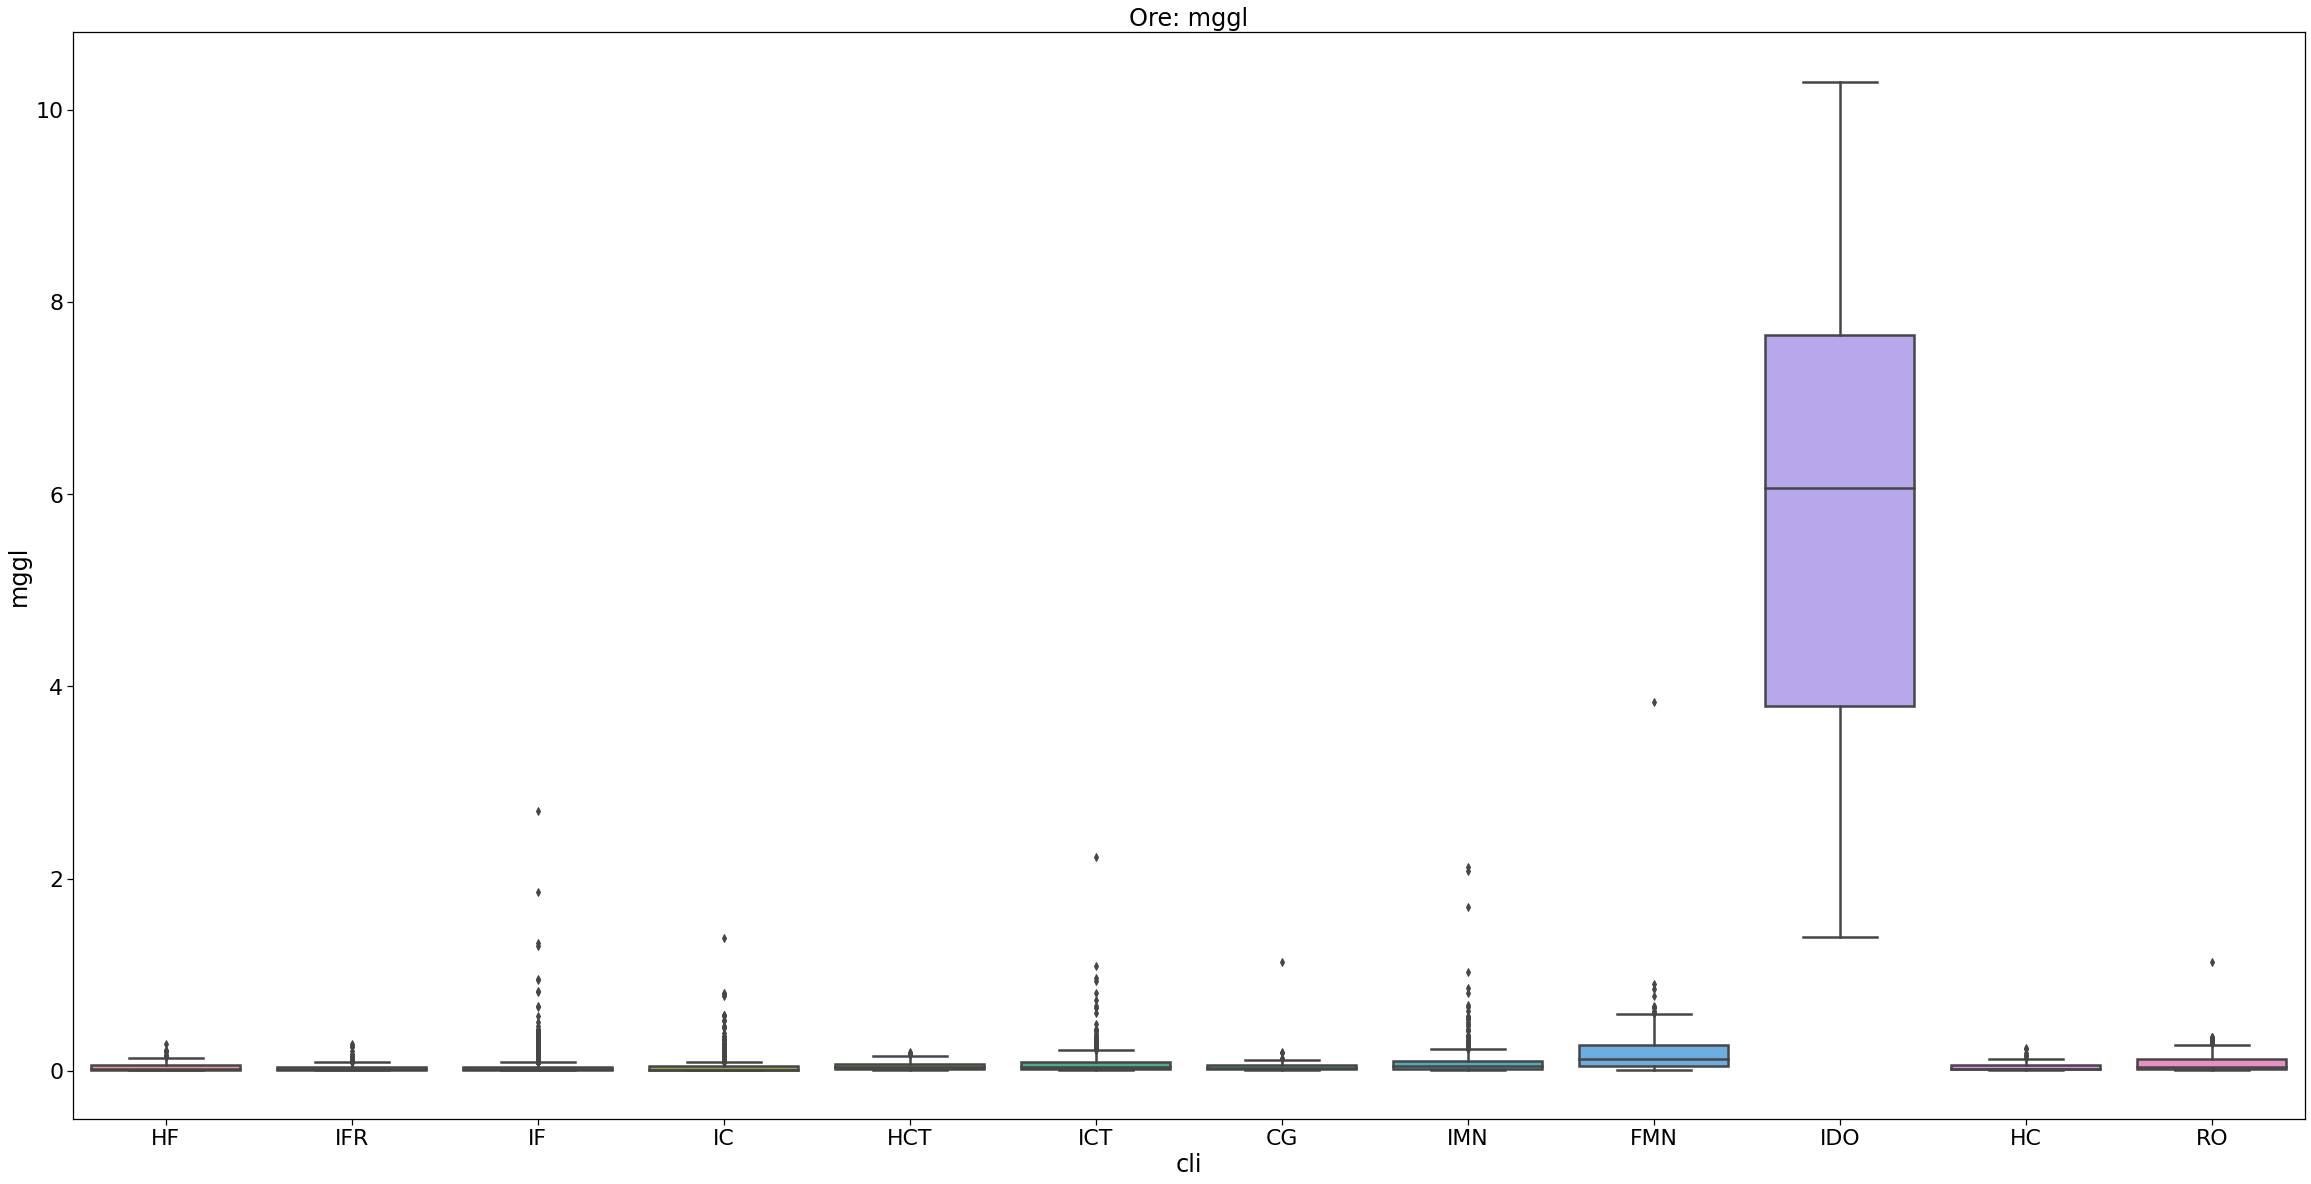

In [43]:
df_ti = df_box[df_box['cli'].isin(['AG','FL', 'IN', 'DO', 'IGO'])]

fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Mggl

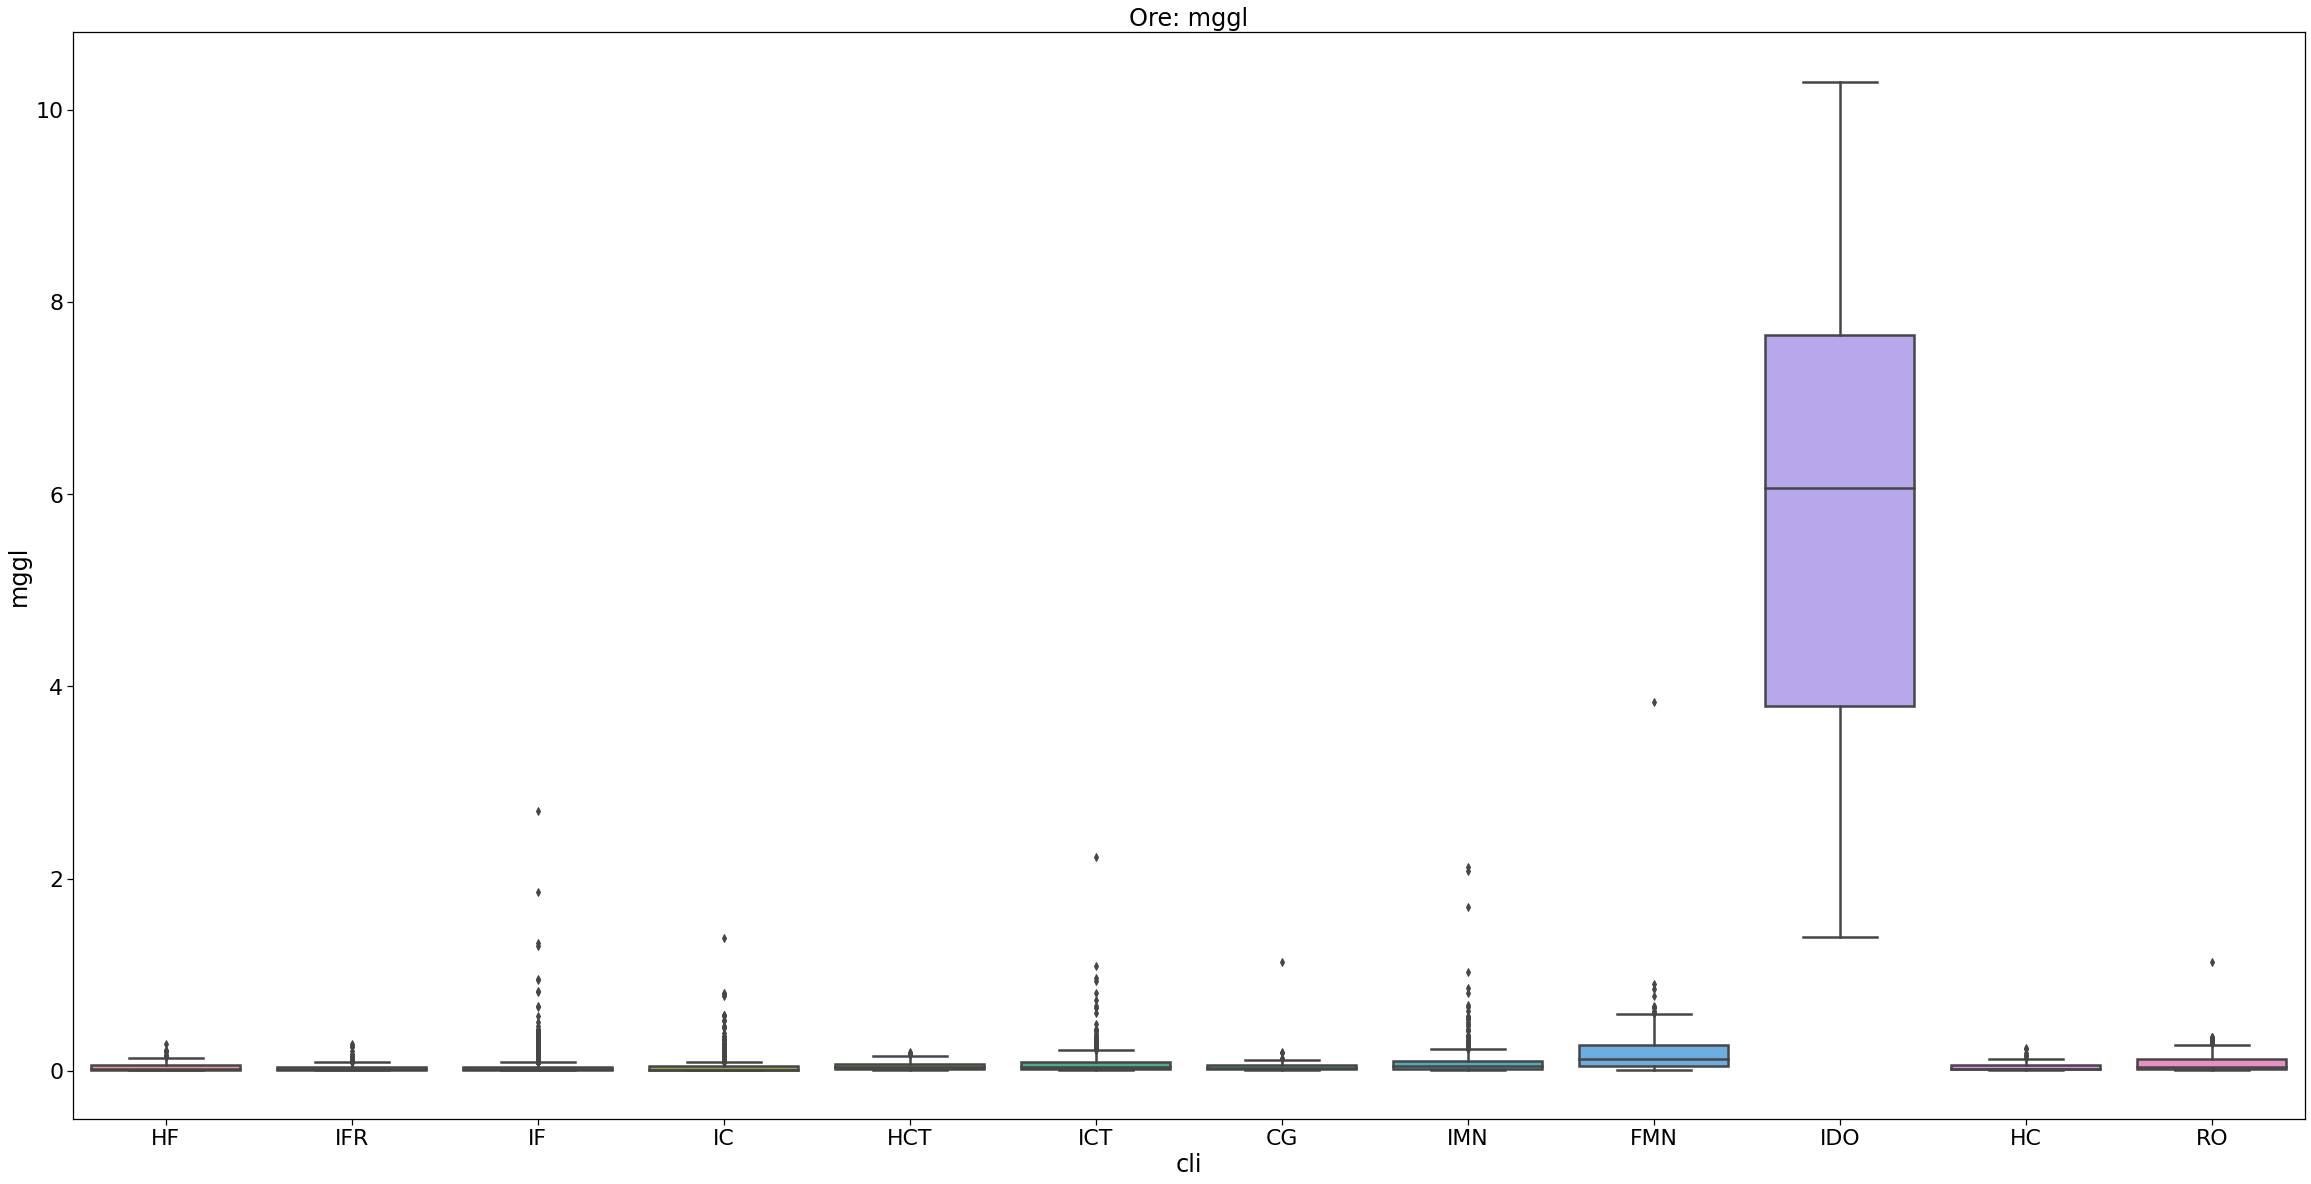

In [44]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'mggl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## Cagl

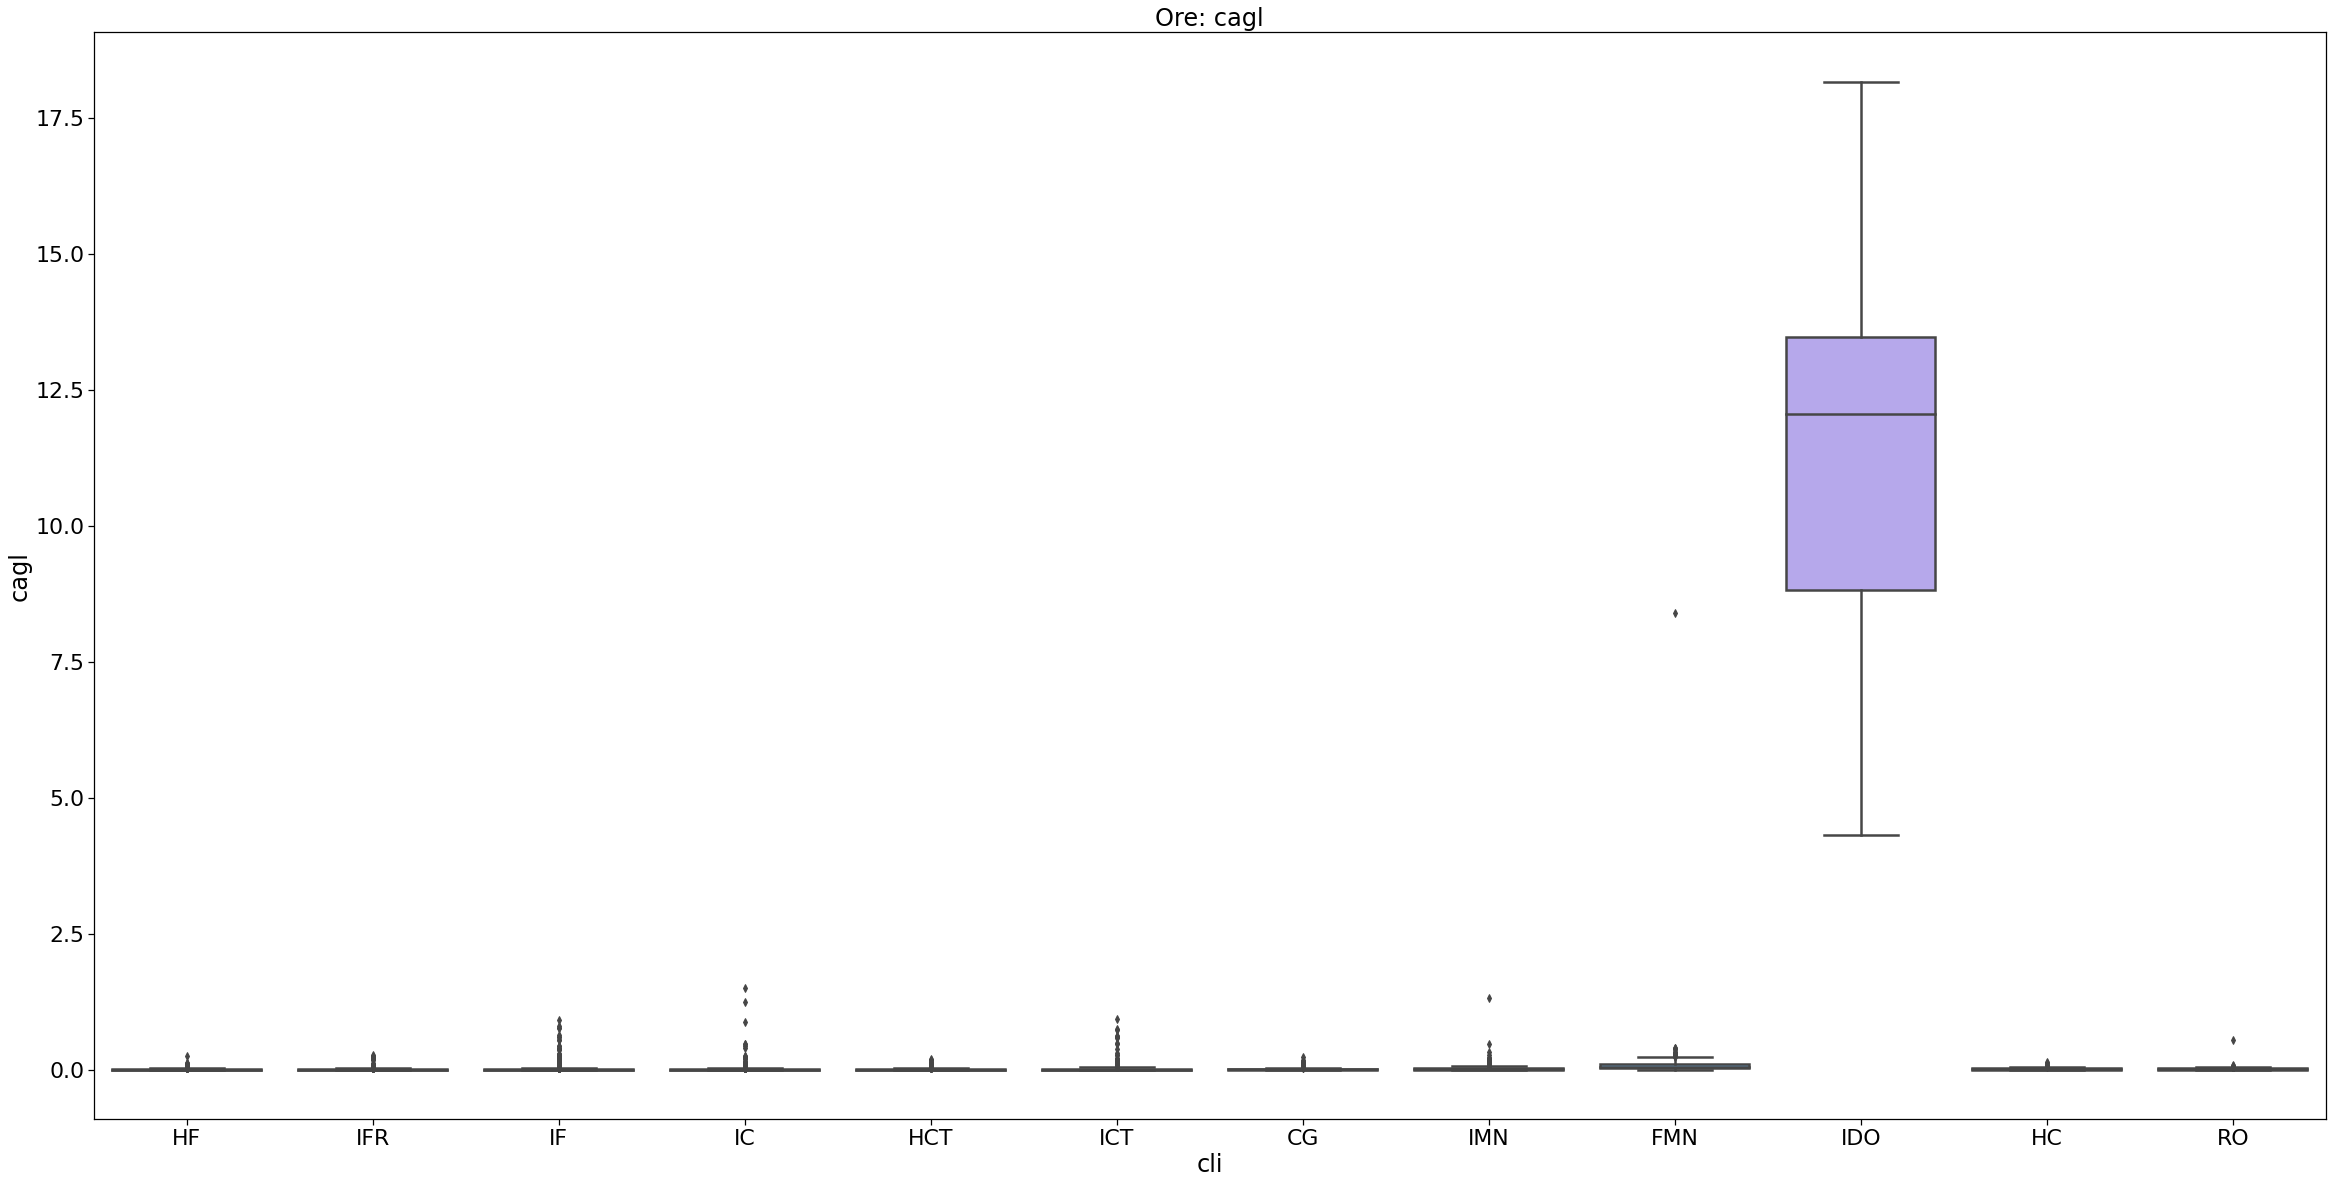

In [45]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

##### Standard plot is useless in this case... Spliting carbonatic rocks..


In [46]:
df_box_sil  = df_box3[~df_box3['cli'].isin(carb_rocks)]
df_box_carb = df_box3[df_box3['cli'].isin(carb_rocks)]

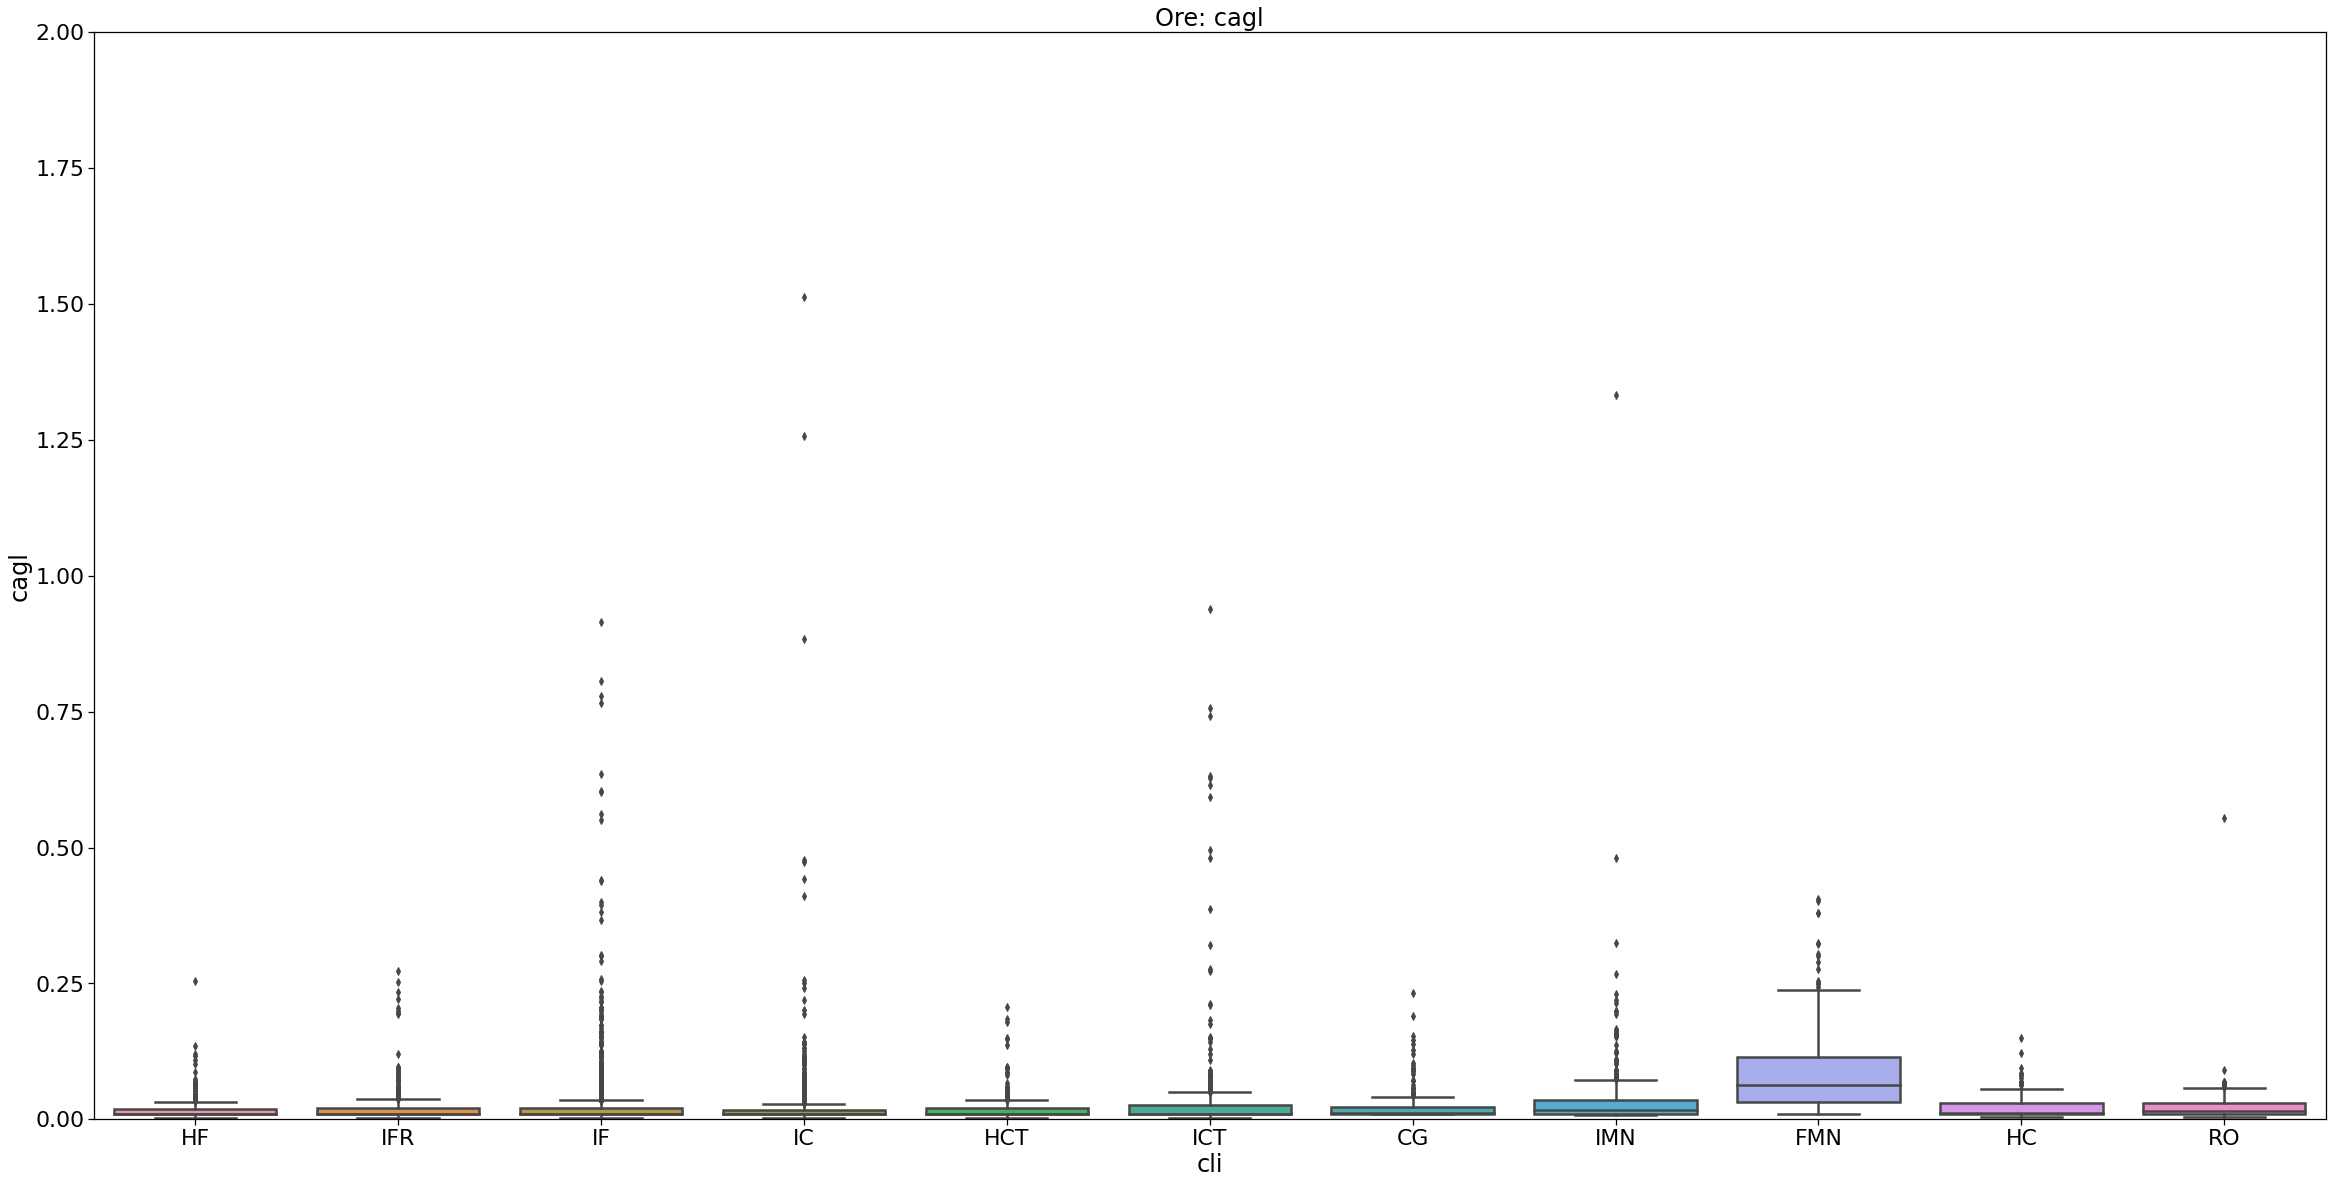

In [47]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x="cli", y=gr, data=df_box_sil)
#setting yaxis to emphasize the box
box.set(ylim=(0, 2))
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

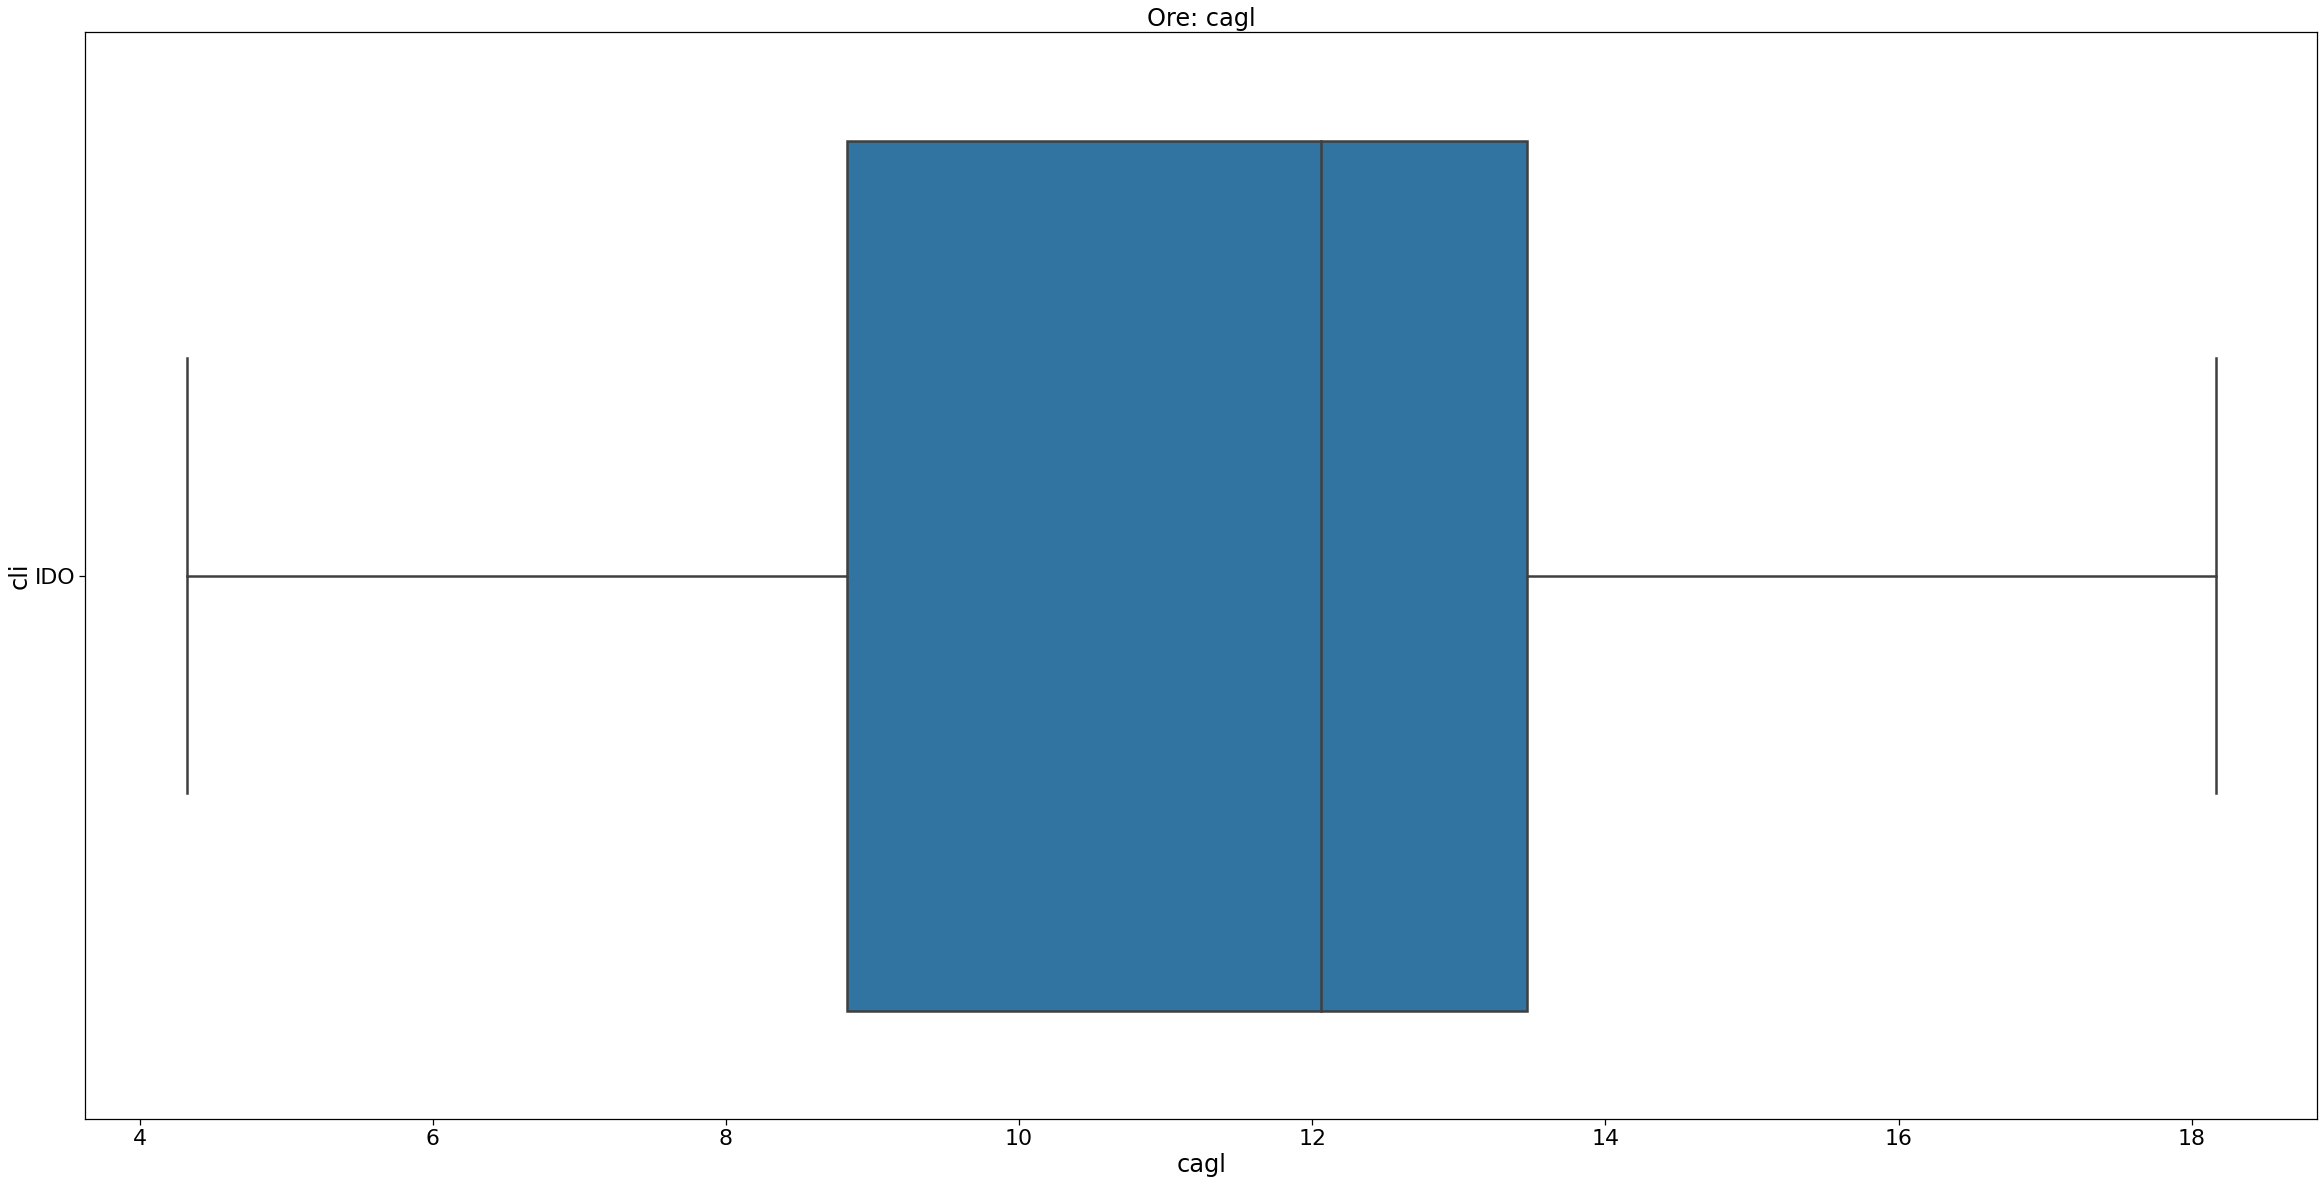

In [48]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'cagl'
box = sea.boxplot(x=gr, y="cli", data=df_box_carb)

box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G1

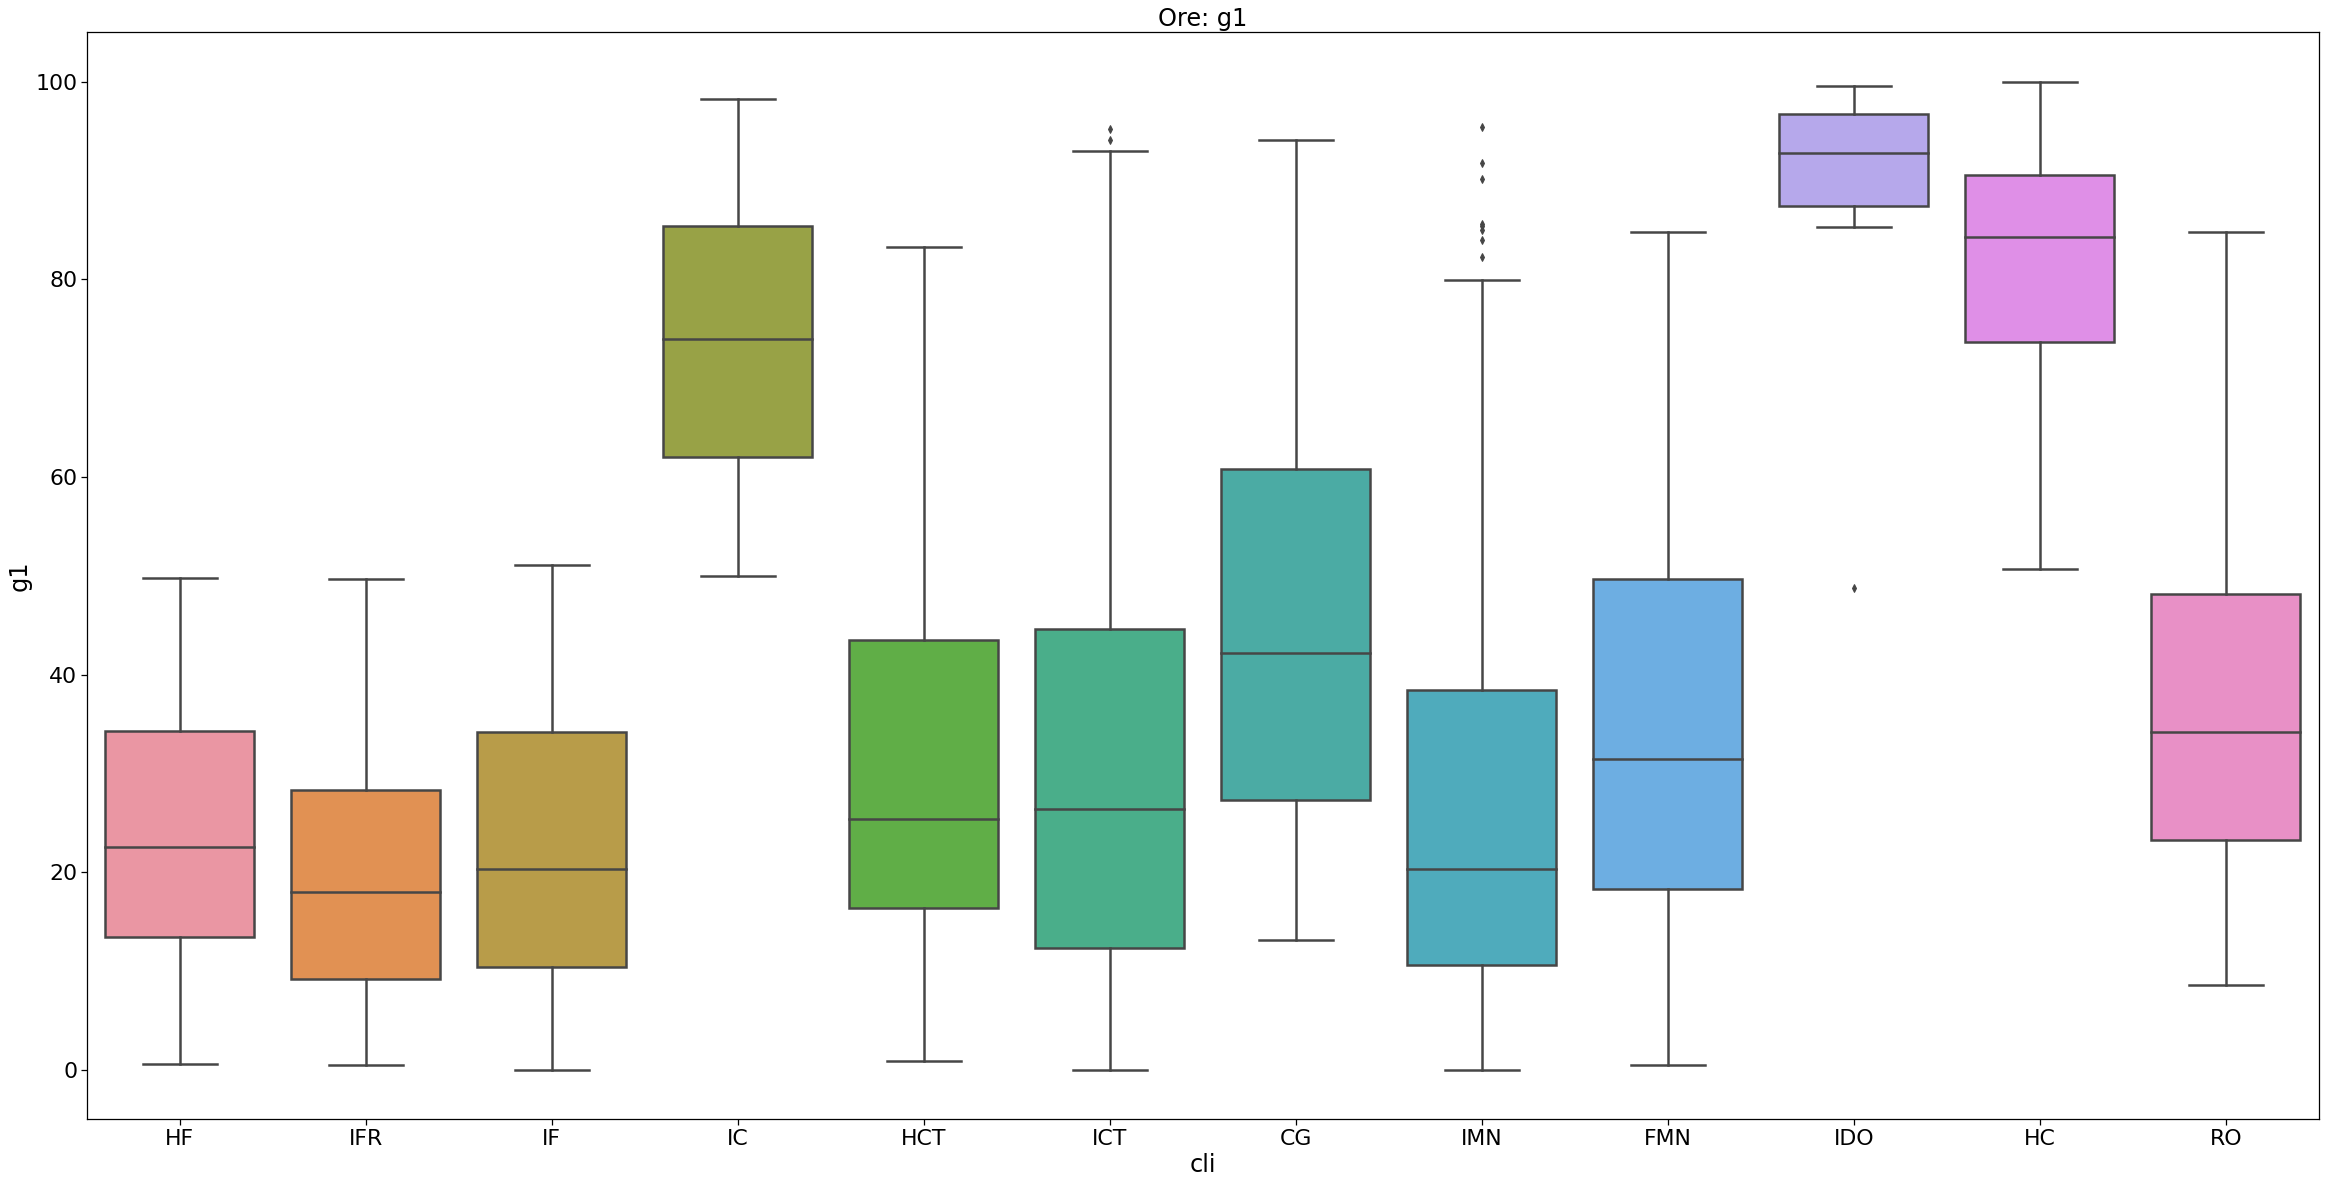

In [49]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g1'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G2

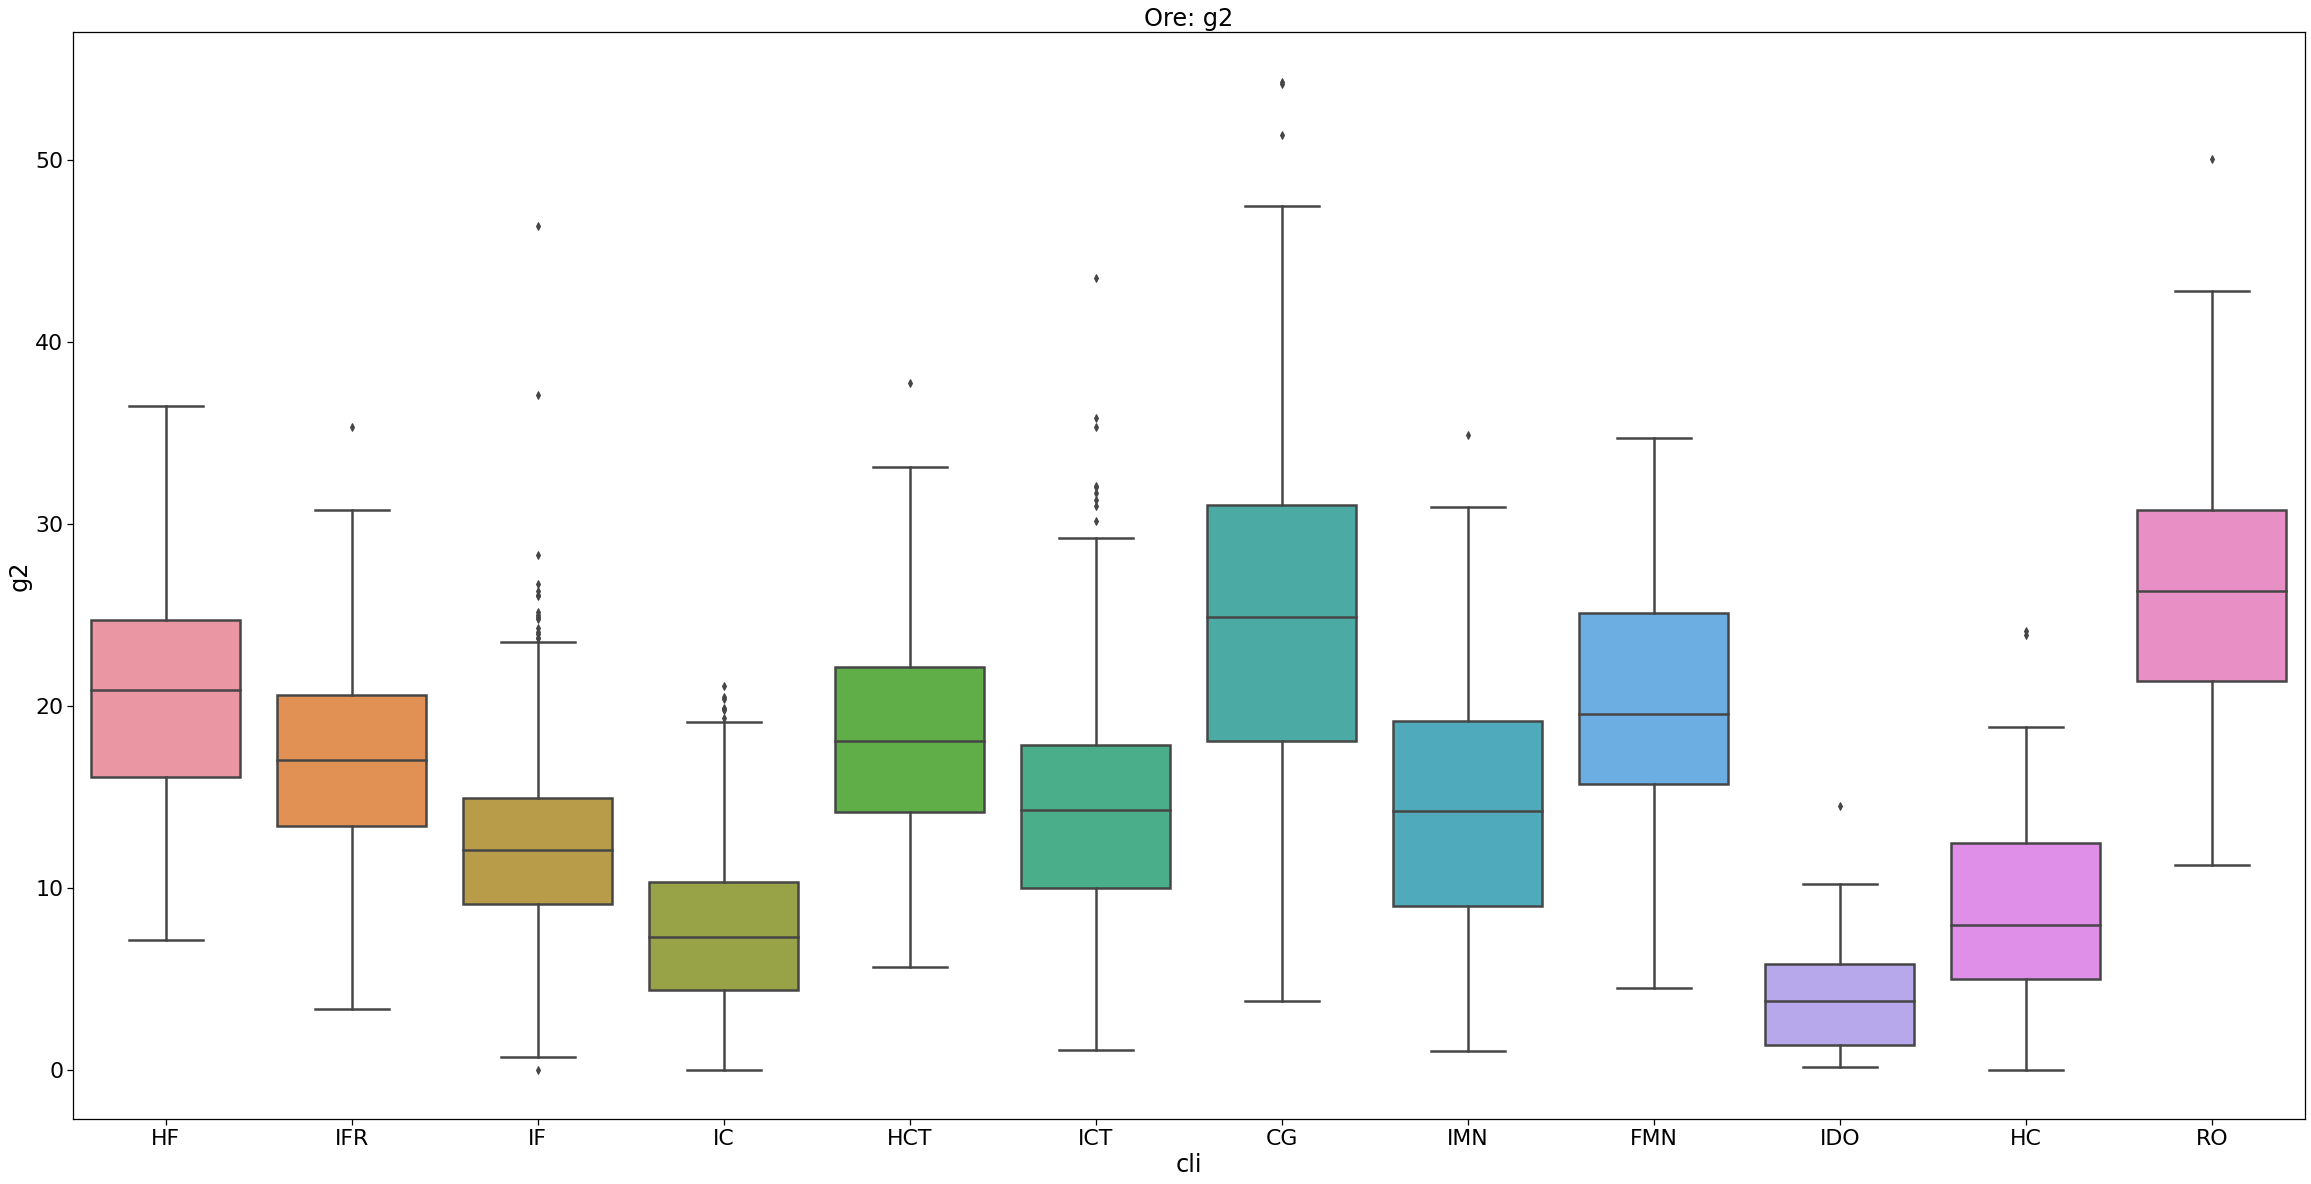

In [50]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g2'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G3

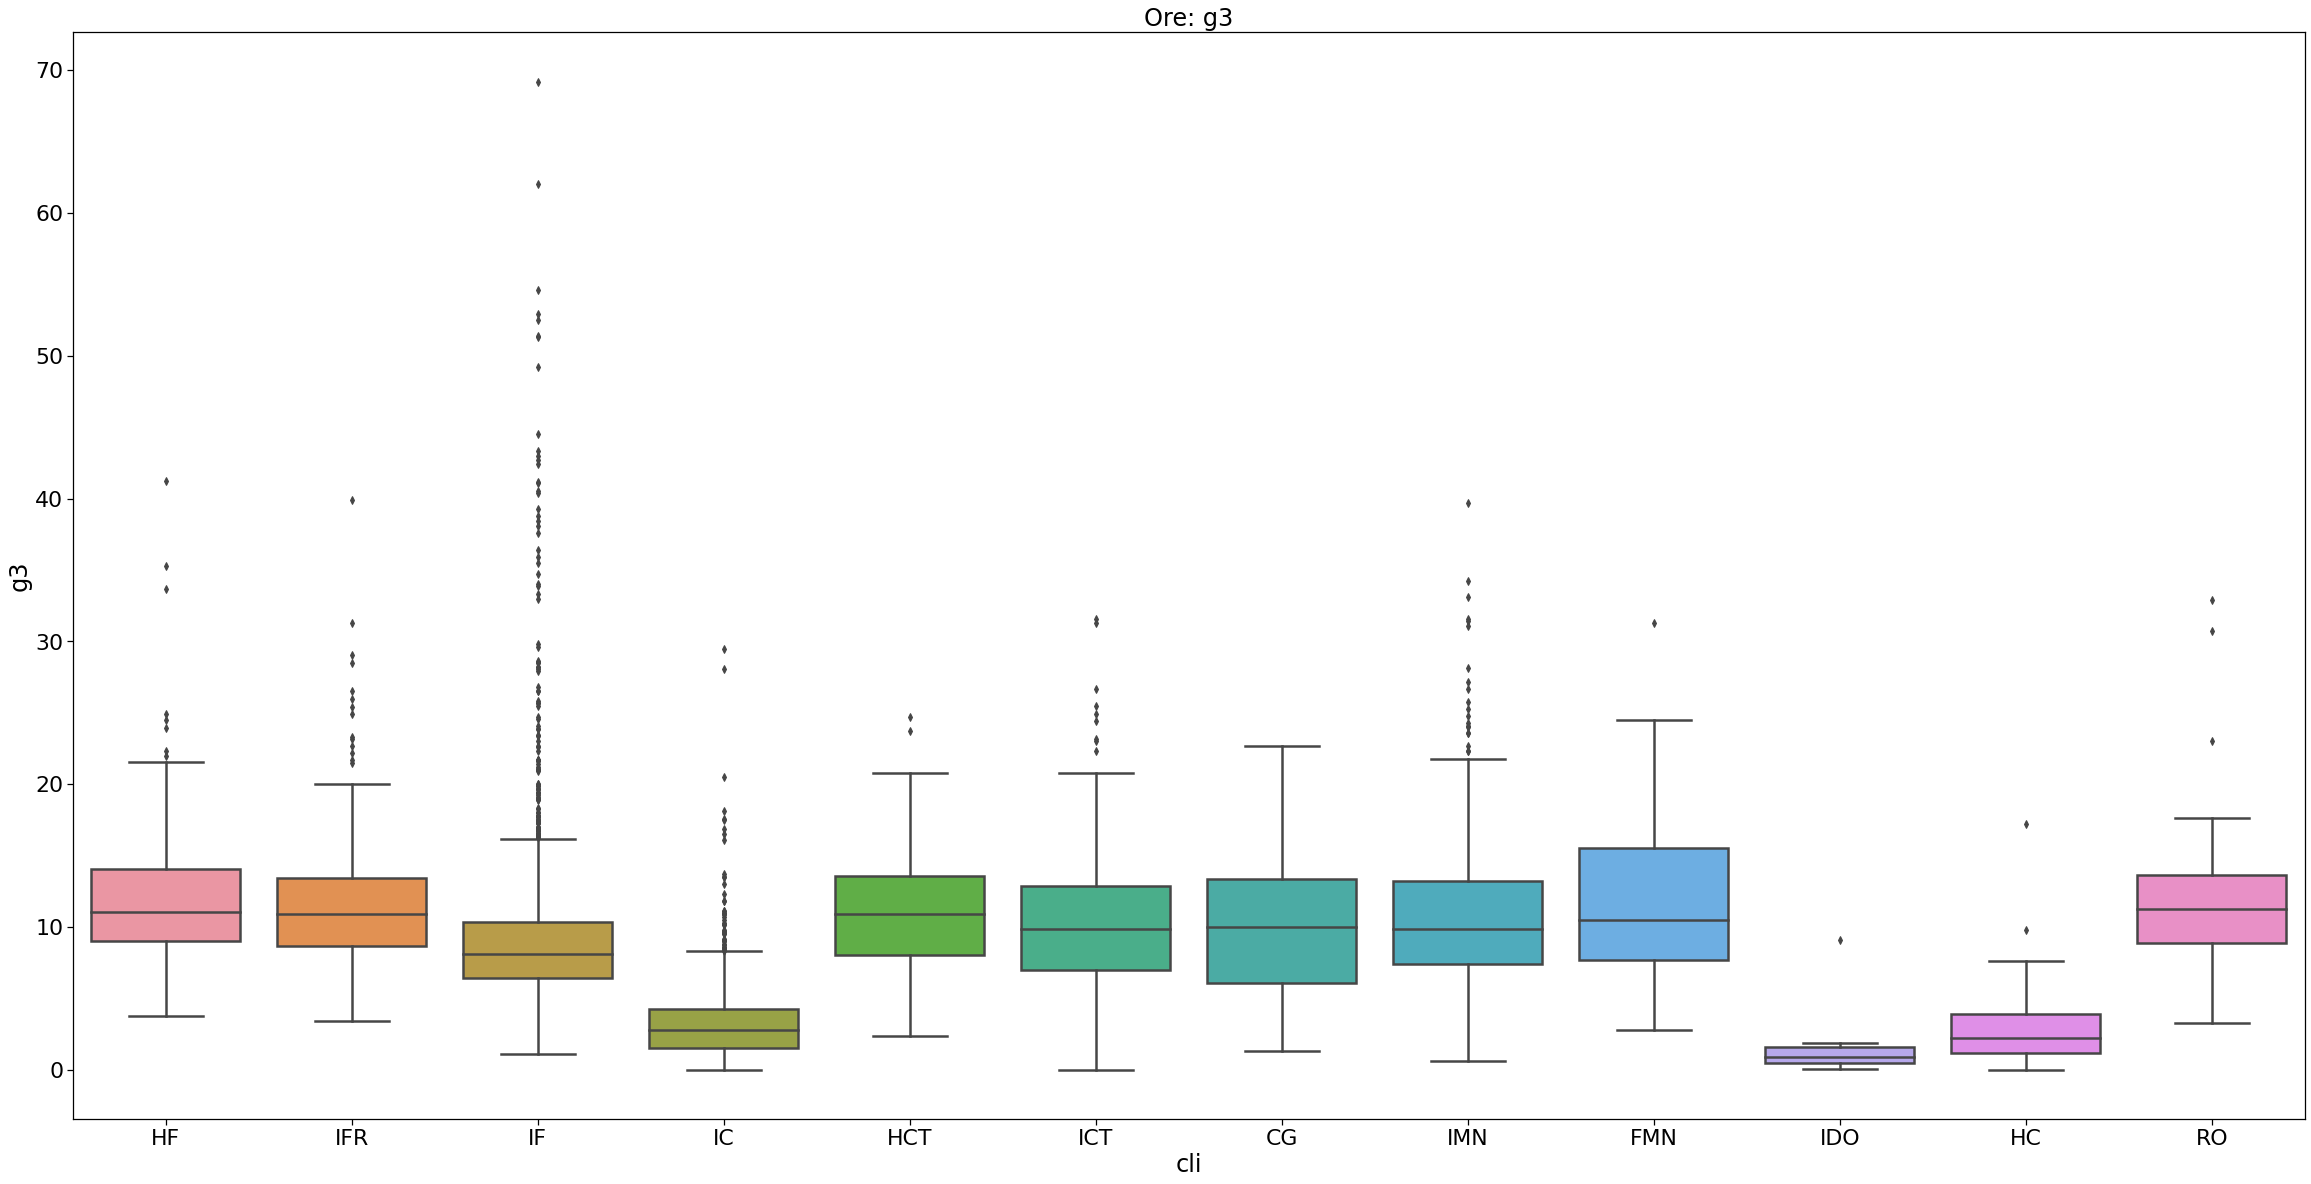

In [51]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g3'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

## G4

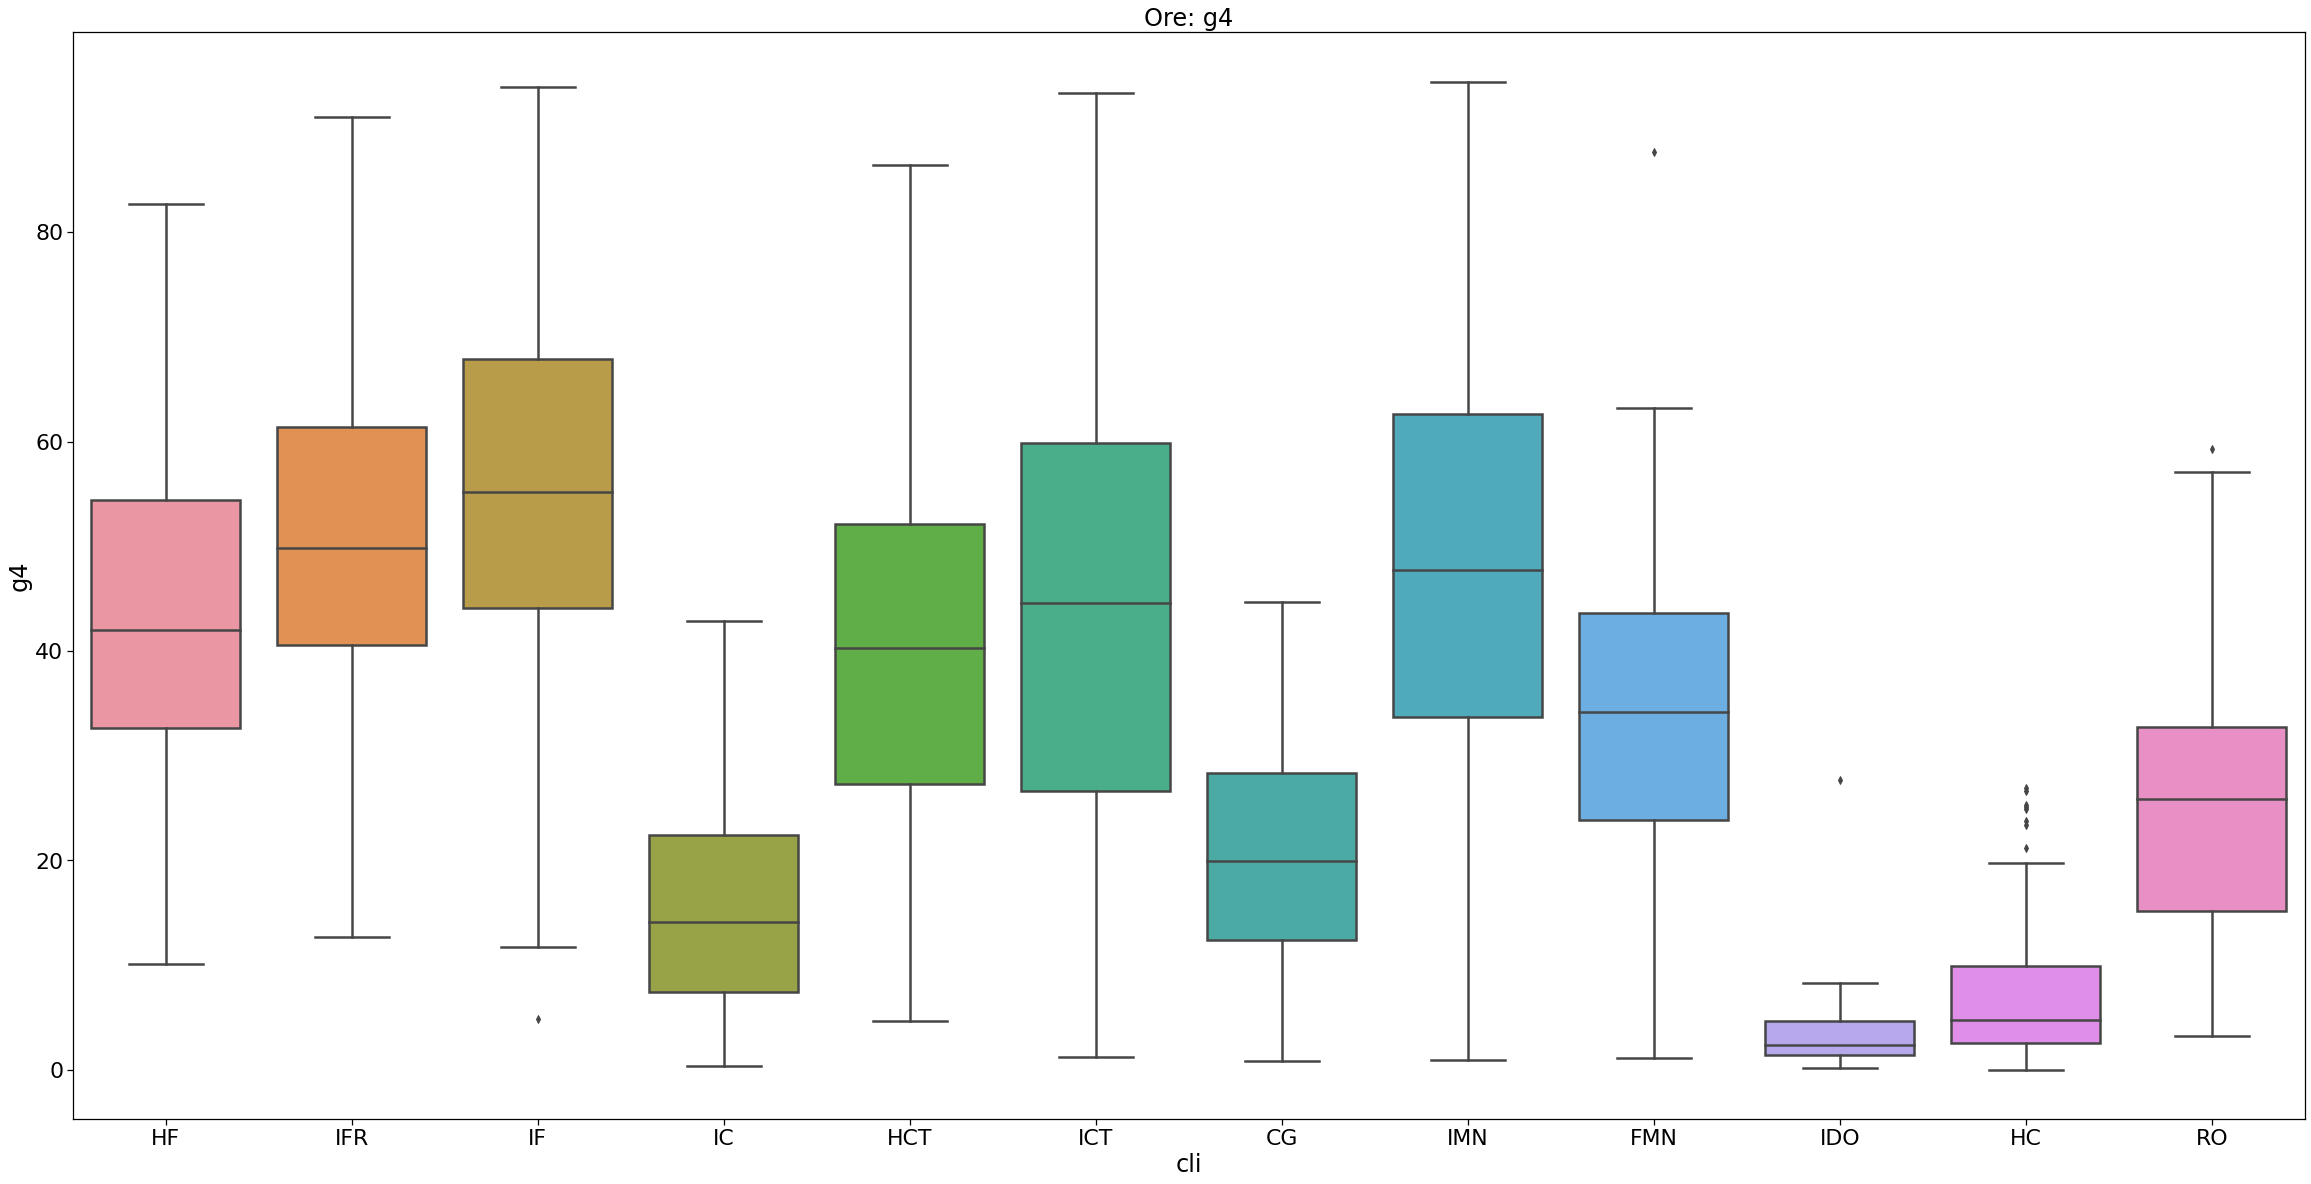

In [52]:
fig = plt.pyplot.figure(figsize=(40,20)) 
gr = 'g4'
box = sea.boxplot(x="cli", y=gr, data=df_box3)
box.set_title('Ore: ' + gr)
sea.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
fig.savefig('boxplot_ore_'+gr+'.jpeg', transparent=None)

In [53]:

df_gl = fso.loc[0:, 'cli':'pfgl']

In [54]:
df_gl.dropna(how='any').shape

(12633, 7)

In [55]:
df_gl2 = df_gl[df_gl['cli'].isin(str_ore)].dropna(how='any')
df_gl2

cli    fegl    sigl    pgl    algl    mngl    pfgl
0       HF  66.590   1.861  0.065   0.770   0.014   1.062
1       HF  66.831   1.982  0.028   1.332   0.014   0.939
2       HF  63.248   6.904  0.030   0.579   0.040   0.723
3      IFR  53.289  22.775  0.021   0.317   0.053   0.556
4       IF  44.702  31.435  0.044   2.738   0.056   1.679
5       IC  44.674  34.720  0.019   0.245   0.022   0.479
6       IC  40.199  42.240  0.040   0.239   0.029   0.726
7       IC  37.715  44.772  0.024   0.132   0.018   0.672
8       IC  34.693  49.320  0.023   0.133   0.022   0.750
9       IC  38.107  44.782  0.054   0.356   0.028   1.526
10      IC  35.351  48.650  0.041   0.437   0.023   0.968
11      IC  33.737  48.866  0.056   0.402   0.024   1.258
12      IC  32.430  50.292  0.055   0.506   0.043   1.751
13      IC  38.560  45.700  0.026   0.630   0.027   0.250
14      IC  29.695  54.717  0.044   0.486   0.052   1.258
15      IC  31.645  52.964  0.031   0.337   0.026   0.782
16      IC  30.098  55.367  0.024   0.325   0.014   0.538
17      IF  29.396  56.445  0.030   0.434   0.018   0.718
18      IC  34.175  49.580  0.023   0.210   0.016   0.637
19      IC  29.588  55.734  0.045   0.410   0.029   0.778
20      IC  32.983  51.762  0.050   0.637   0.158   1.448
21      IC  31.224  53.681  0.057   0.682   0.066   1.033
22      IC  33.595  51.108  0.050   0.391   0.062   1.016
23      IC  33.126  50.696  0.028   0.327   0.029   0.931
24      IC  32.910  51.251  0.037   0.416   0.026   0.758
25      IC  31.970  52.502  0.032   0.504   0.033   0.986
26      IF  28.453  56.165  0.070   0.638   0.110   2.161
27      IF  23.000  63.970  0.063   0.490   0.266   1.570
28      IF  26.840  58.760  0.074   0.980   0.185   1.780
29      IC  27.346  58.260  0.020   0.403   0.151   0.546
30      IF  27.528  57.367  0.048   0.639   0.325   1.117
31      IC  29.452  55.828  0.035   0.548   0.195   0.939
32      IC  29.664  57.703  0.018   0.377   0.010   0.204
34     HCT  62.928   3.235  0.049   3.134   0.007   2.685
35     HCT  61.920   6.194  0.018   3.315   0.003   1.433
36     HCT  62.446   5.676  0.023   3.065   0.003   1.336
37      HF  65.211   5.480  0.019   1.164   0.002   0.555
38      IF  47.208  30.864  0.020   0.660   0.002   0.717
39      IF  37.138  44.735  0.027   0.842   0.002   0.942
40      IF  38.941  41.904  0.033   0.378   0.002   1.569
41      IC  32.355  51.907  0.020   0.361   0.002   0.796
42      IC  38.049  42.575  0.041   0.508   0.002   2.010
43      IC  41.960  37.324  0.040   0.607   0.002   1.863
44      IC  39.568  40.224  0.044   0.625   0.002   2.241
45     ICT  37.778  40.663  0.061   1.102   0.002   3.678
46      IC  42.143  34.704  0.065   1.373   0.002   3.124
47     ICT  55.200  15.297  0.056   1.361   0.006   4.129
48      IF  41.529  38.302  0.022   0.751   0.003   1.208
49      IF  33.908  48.999  0.016   0.696   0.002   0.780
50      IF  33.153  50.993  0.008   0.291   0.002   0.373
51      IF  34.881  49.191  0.008   0.265   0.002   0.362
52     IFR  52.780  22.259  0.036   1.662   0.003   0.858
53      IF  47.717  29.340  0.030   1.291   0.003   0.633
54      IF  45.348  32.928  0.027   1.014   0.002   0.540
55      IF  47.130  30.434  0.031   0.677   0.002   0.580
56     IFR  52.460  23.500  0.037   0.880   0.010   0.830
57      IF  38.998  42.282  0.040   0.535   0.002   0.717
58      IF  28.593  58.497  0.020   0.392   0.002   0.409
59      IF  38.539  43.933  0.010   0.150   0.002   0.310
60      IC  33.428  50.730  0.018   0.224   0.002   0.623
61      IC  32.267  52.322  0.036   0.519   0.002   1.016
62      IF  34.256  48.641  0.035   0.972   0.002   1.145
63      IF  35.330  49.540  0.015   0.490   0.010   0.460
64      IF  30.150  53.906  0.027   1.485   0.002   0.973
65      IF  29.933  53.748  0.019   2.170   0.035   0.954
66      IF  30.607  54.627  0.010   1.841   0.010   0.634
67      IF  33.519  49.181  0.020   2.750   0.010   1.074
68      IF  33.829  48.397  0.016   2.378   0.042   0.908
70   

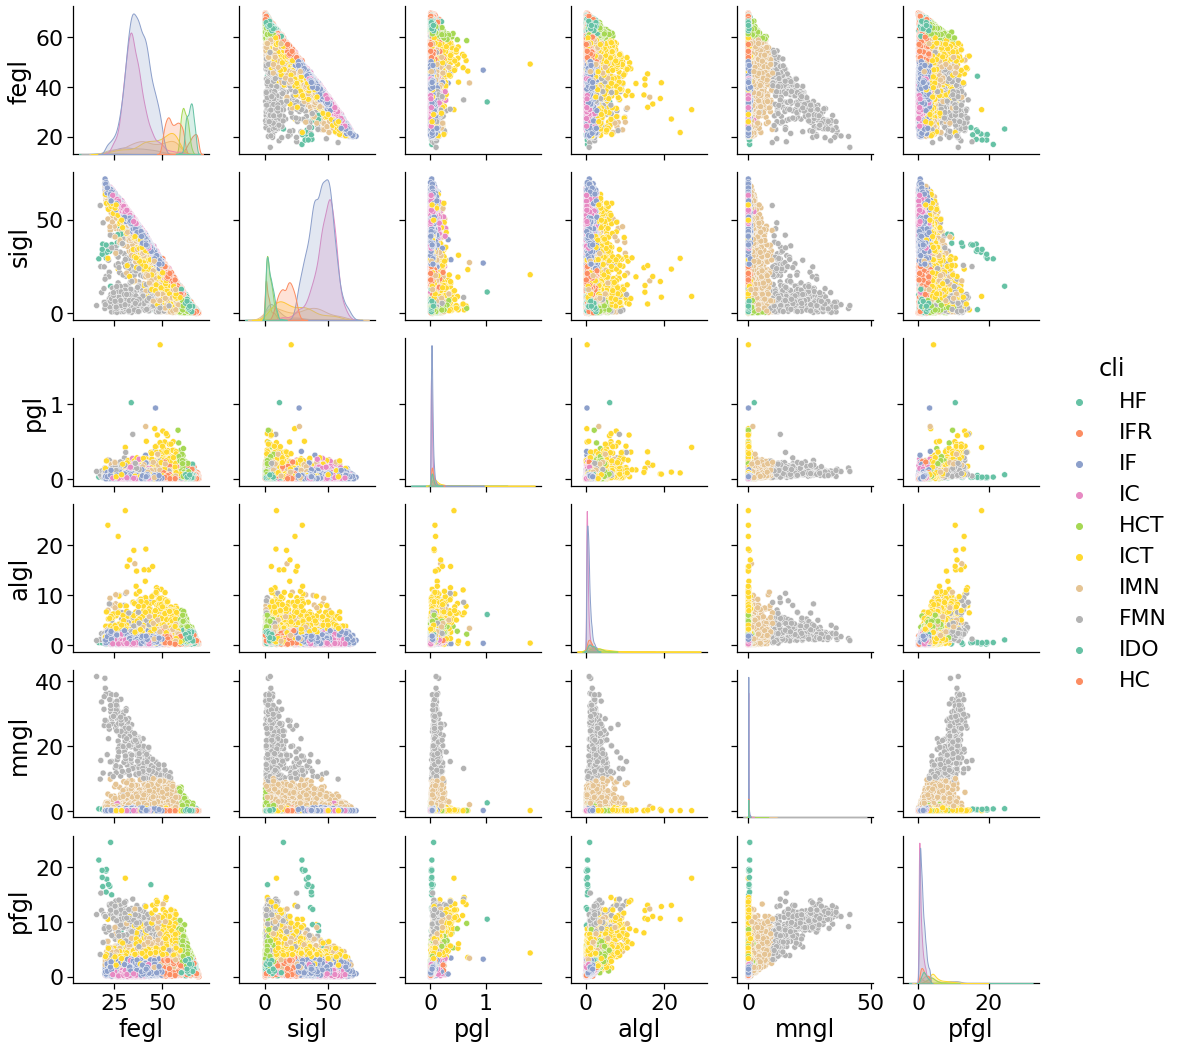

In [56]:
sea.pairplot(df_gl2, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [57]:
df_gl3 = df_gl2[df_gl2['cli'].isin(basin_rock)]

NameError: name 'basin_rock' is not defined

In [ ]:
df_gl3.head()

In [ ]:
sea.pairplot(df_gl3, kind="scatter", hue="cli",  palette="Set2")
plt.pyplot.show()

In [ ]:
cac.groupby(['geocod'])['fegl'].describe()


In [ ]:
cac[cac['compid']=='10M_FLP'].hist(by='geocod', column='fegl', histtype='step', bins=20, figsize=(15,10), alpha=0.5)

In [ ]:
# EXAMPLE: filterinfDataframe = dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True)

In [ ]:
cac[(cac['geocod'].isin(fresh_clean)) & (cac['compid']=='10M_FLP')].groupby(['geocod']).fegl.plot.hist(stacked=True, \
                                                                                                    
    histtype='step', bins=20, figsize=(10,10), legend=True, density=True)

In [ ]:
sea.set_theme()

In [ ]:
penguins=sea.load_dataset("penguins")

In [ ]:
g=sea.PairGrid(penguins,hue="species",corner=True)
g.map_lower(sea.kdeplot,hue=None,levels=5,color=".2")
g.map_lower(sea.scatterplot,marker="+")
g.map_diag(sea.histplot,element="step",linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
print(sea.__version__)

In [ ]:
g = sea.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sea.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sea.scatterplot, marker="+")
g.map_diag(sea.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))